# Video games (backloggd.com)

**Exploratory data analysis (EDA)**
***

About the site **Backloggd**:

"**Backloggd** is a place to keep your personal video game collection. Every game from every platform is here for you to log into your journal. Follow friends along the way to share your reviews and compare ratings. Then use filters to sort through your collection and see what matters to you. Keep a backlog of what you are currently playing and what you want to play, see the numbers change as you continue to log your playthroughs. There"s Goodreads for books, Letterboxd for movies, and now Backloggd for games.

All game related metadata comes from the community driven database **[IGDB](https://www.igdb.com/)**. This includes all game, company and platform data you see on the site." - 
from the site **[backloggd.com](https://www.backloggd.com/)**.

**The purpose of exploratory data analysis**: to analyze the main properties of the data, to detect common distributions, dependencies and anomalies using visualization tools.

**Exploratory data analysis steps**:
1. [Data overview](#data_overview).
2. [Data preprocessing](#data_preprocessing).
    - [Handling field names](#handling_field_names);
    - [Handling explicit duplicates](#handling_explicit_duplicates).
    - [Handling empty records](#handling_empty_records);
    - [Handling data types](#handling_data_types);
    - [Changing structure](#changing_structure);
    - [Search anomalies](#search_anomalies);
    - [Finding implicit duplicates](#finding_implicit_duplicates);
    - [Data preprocessing conclusions](#data_preprocessing_conclusions);
3. [Data distribution analysis](#data_distribution_analysis).
    1. [General distribution variables](#general_distribution_variables):
        - [video game genres](#video_game_genres);
        - [developers](#publishing_companies);
        - [gaming platforms](#gaming_platforms);
        - [release categories](#release_categories);
        - [release date](#release_date);
        - [intermediate conclusions](#conclusions_data_distribution_analysis).
    2. [Video game rating distribution](#video_game_rating_distribution):
        - [by genres](#rating_distribution_by_genres);
        - [by developers](#rating_distribution_by_publishing_companies);
        - [by gaming platformsм](#rating_distribution_by_gaming_platforms);
        - [intermediate conclusions](#video_game_rating_distribution_conclusions).
4. [Finding_dependencies](#finding_dependencies).
    1. [Dependence number players](#dependence_number_players):
        - [from the number of reviews left](#dependence_number_player_on_reviews);
        - [from the number of people currently playing](#dependence_number_players_on_players_currently);
        - [from the number of additions to the wishlist](#dependence_number_players_on_additions_wishlist);
        - [from the number of additions to the backlog](#dependence_number_players_on_additions_backlog);
        - [multicollinearity estimation](#multicollinearity_estimation);
        - [intermediate conclusions](#dependence_number_players_conclusions).
5. [Conclusions](#conclusions).
***

In [1]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.gridspec import GridSpec

## <a id=data_overview>Data overview</a>
***

In [2]:
df = pd.read_csv("../data/backloggd/backloggd.csv")

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92153 entries, 0 to 92152
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         92153 non-null  object 
 1   date         92153 non-null  object 
 2   developers   92153 non-null  object 
 3   rating       35988 non-null  float64
 4   platforms    92153 non-null  object 
 5   genres       92153 non-null  object 
 6   category     92153 non-null  object 
 7   main         92153 non-null  object 
 8   reviews      92153 non-null  int64  
 9   plays        92153 non-null  int64  
 10  playing      92153 non-null  int64  
 11  backlogs     92153 non-null  int64  
 12  wishlists    92153 non-null  int64  
 13  description  87438 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 88.9 MB


In [4]:
df.head()

,name,date,developers,rating,platforms,genres,category,main,reviews,plays,playing,backlogs,wishlists,description
0,Cathode Ray Tube Amusement Device,1947-12-31,[],3.7,['Analogue electronics'],['Point-and-Click'],main,Cathode Ray Tube Amusement Device,33,57,1,11,28,The cathode ray tube amusement device is the e...
1,Bertie the Brain,1950-08-25,['Josef Kates'],1.3,['Arcade'],"['Puzzle', 'Tactical']",main,Bertie the Brain,3,5,0,3,3,Currently considered the first videogame in hi...
2,Draughts,1952-08-31,['Christopher Strachey'],NaN,['Legacy Computer'],['Card & Board Game'],main,Draughts,1,3,0,1,0,A game of draughts (a.k.a. checkers) written f...
3,OXO,1952-12-31,"['Alexander Shafto ""Sandy"" Douglas', 'Universi...",3.5,"['Windows PC', 'EDSAC']","['Puzzle', 'Strategy']",main,OXO,9,25,0,6,7,OXO was a computer game developed by Alexander...
4,Pool,1954-06-26,[],NaN,['Legacy Computer'],['Sport'],main,Pool,1,1,0,0,0,A game of pool (billiards) developed by Willia...


In [5]:
df.tail()

,name,date,developers,rating,platforms,genres,category,main,reviews,plays,playing,backlogs,wishlists,description
92148,Alone in the Dark Prologue: Grace in the Dark,2023-05-25,"['THQ Nordic', 'Pieces Interactive']",2.7,"['Windows PC', 'PlayStation 5', 'Xbox Series']",['Adventure'],pack,Alone in the Dark,28,76,1,13,15,Grace in the Dark is a free-to-play prelude to...
92149,Arcade Paradise: Vostok Inc. Pinball,2023-05-25,[],NaN,['Nintendo Switch'],"['Adventure', 'Indie', 'Simulator']",pack,Arcade Paradise,0,0,0,0,0,Do you like money? How about Arcades? Then you...
92150,Etrian Odyssey III HD Character Set DLC,2023-06-01,"['Sega', 'Atlus']",NaN,"['Windows PC', 'Nintendo Switch']","['Adventure', 'RPG']",pack,Etrian Odyssey III HD,0,0,0,0,1,"Originally available as a pre-order bonus, and..."
92151,Etrian Odyssey HD Character Set DLC,2023-06-01,"['Sega', 'Atlus']",NaN,"['Windows PC', 'Nintendo Switch']","['Adventure', 'RPG']",pack,Etrian Odyssey HD,1,1,0,0,1,"Originally available as a pre-order bonus, and..."
92152,Etrian Odyssey II HD: Character Set DLC,2023-06-01,"['Sega', 'Atlus']",NaN,"['Windows PC', 'Nintendo Switch']","['Adventure', 'RPG']",pack,Etrian Odyssey II HD,0,0,0,0,1,"Originally available as a pre-order bonus, and..."


**Intermediate conclusions:**:

- data read **correctly**;
- **total** there are **14 fields** and **92153 records** in the dataset;
- the dataset has the following data types: **float64(1)**, **int64(5)**, **object(8)**:
- the dataset **contains empty records**.

## <a id=data_preprocessing>Data preprocessing</a>
***

In [6]:
sns.set_style('white')

### <a id=handling_field_names>Handling field names</a>
***

In [7]:
df.columns.tolist()

['name',
 'date',
 'developers',
 'rating',
 'platforms',
 'genres',
 'category',
 'main',
 'reviews',
 'plays',
 'playing',
 'backlogs',
 'wishlists',
 'description']

Let"s leave the field names **unchanged**.

### <a id=handling_explicit_duplicates>Handling explicit duplicates<a>
***

In [8]:
f'{df.duplicated().sum()} - {df.duplicated().sum() / df.shape[0]:.1%}'

'0 - 0.0%'

**No obvious duplicates found**.

### <a id=handling_empty_records>Handling empty records</a>
***

In [9]:
size = df.shape[0]

In [10]:
(pd.DataFrame({
    "empty": df.isna().sum(),
    "ratio": df.isna().sum() / size
}).style
  .format({"ratio": lambda x: f'{x:.1%}'}))

,empty,ratio
name,0,0.0%
date,0,0.0%
developers,0,0.0%
rating,56165,60.9%
platforms,0,0.0%
genres,0,0.0%
category,0,0.0%
main,0,0.0%
reviews,0,0.0%
plays,0,0.0%


The dataset contains empty entries in the fields: **"rating"** (56165 - 60.9%) and **"description"** (4715 - 5.1%). Presumably, this is due to the fact that these games are little known. To confirm or refute this assumption, for games that do not have a rating or description, we will get descriptive statistics for the "reviews", "plays", "playing", "backlogs" and "wishlists" fields.

In [11]:
indicators = "reviews", "plays", "playing", "backlogs", "wishlists"

In [12]:
(df.loc[(df["rating"].isna()) | (df["description"].isna()), [*indicators]].describe(percentiles=[.25, .75, .95]))

,reviews,plays,playing,backlogs,wishlists
count,56932.000000,56932.000000,56932.000000,56932.000000,56932.000000
mean,0.110816,1.527313,0.051219,1.317993,0.804855
std,0.452090,4.937239,0.275295,3.464383,2.619915
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,1.000000,1.000000
95%,1.000000,5.000000,0.000000,5.000000,4.000000
max,25.000000,368.000000,13.000000,171.000000,140.000000


Indeed, **95%** of games that have no rating or description have "reviews", "plays", "playing", "backlogs" and "wishlists" **values ​​less than 5**. Let"s see how many entries have a value of 0 in all of the above fields.

In [13]:
print(f'{df.loc[df[[*indicators]].sum(axis=1) == 0].shape[0]} - '
      f'{df.loc[df[[*indicators]].sum(axis=1) == 0].shape[0] / size:.2%}')

14315 - 15.53%


**Remove** record data from the dataset.

In [14]:
df = df.loc[df[[*indicators]].sum(axis=1) != 0]

In [15]:
(pd.DataFrame({
    "empty": df.isna().sum(),
    "ratio": df.isna().sum() / size
}).style
  .format({"ratio": lambda x: f'{x:.1%}'}))

,empty,ratio
name,0,0.0%
date,0,0.0%
developers,0,0.0%
rating,41850,45.4%
platforms,0,0.0%
genres,0,0.0%
category,0,0.0%
main,0,0.0%
reviews,0,0.0%
plays,0,0.0%


Note that the fields **"developers", "platforms" and "genres"** have data type **object** and their values ​​are **Python language lists** represented by the corresponding **literals**. The value **"[ ]"** should be interpreted as **empty**.

In [16]:
(pd.DataFrame({
    "empty": np.sum(df[["developers", "platforms", "genres"]] == '[]'),
    "ratio": np.sum(df[["developers", "platforms", "genres"]] == '[]') / size
}).style
  .format({"ratio": lambda x: f'{x:.1%}'}))

,empty,ratio
developers,19900,21.6%
platforms,2,0.0%
genres,5661,6.1%


Let"s assume that **blank entries in the "companies" and "genres" fields** are also a consequence of the **unpopularity and obscurity** of the game.

In [17]:
df.loc[(df["developers"] == "[]") & (df["genres"] == "[]"), [*indicators]].describe(percentiles=[.25, .75, .95])

,reviews,plays,playing,backlogs,wishlists
count,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,0.563474,6.787537,0.166390,2.640703,1.501160
std,2.976148,34.589276,1.366091,8.001668,7.466242
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,1.000000,0.000000
75%,0.000000,5.000000,0.000000,2.000000,1.000000
95%,2.000000,24.000000,1.000000,12.000000,6.000000
max,119.000000,1313.000000,55.000000,229.000000,318.000000


Indeed, **95% of the games** that do not have information about publishers and descriptions, the values in the fields "reviews", "plays", "playing", "backlogs", "wishlists" **do not exceed 25**. At **maximum values** from several tens, **to several thousand**. Let"s count the number of such records.

In [18]:
print(f'{df.loc[(df["developers"] == "[]") & (df["genres"] == "[]")].shape[0]} - '
      f'{df.loc[(df["developers"] == "[]") & (df["genres"] == "[]")].shape[0] / size:.2%}')

3017 - 3.27%


**Remove** record data from the dataset.

In [19]:
df = df.loc[(df["developers"] != "[]") | (df["genres"] != "[]")]

In [20]:
(pd.DataFrame({
    "empty": np.sum(df[["developers", "platforms", "genres"]] == "[]"),
    "ratio": np.sum(df[["developers", "platforms", "genres"]] == "[]") / size
}).style
  .format({"ratio": lambda x: f"{x:.1%}"}))

,empty,ratio
developers,16883,18.3%
platforms,0,0.0%
genres,2644,2.9%


### <a id=handling_data_types>Handling data types</a>
***

Let"s change the data types:
- for the field **"date"** to the data type **"datetime"**;
- for fields with **numeric data type**, reduce the precision to **32 bits**;
- for the fields **"developers"**, **"platforms"**, **"genres"**, convert the literals to the **list** type.

In [21]:
df.dtypes

name            object
date            object
developers      object
rating         float64
platforms       object
genres          object
category        object
main            object
reviews          int64
plays            int64
playing          int64
backlogs         int64
wishlists        int64
description     object
dtype: object

In [22]:
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df["date"].head()

0   1947-12-31
1   1950-08-25
2   1952-08-31
3   1952-12-31
4   1954-06-26
Name: date, dtype: datetime64[ns]

In [23]:
df = df.astype({
    "rating": "float32",
    "plays": "int32",
    "playing": "int32",
    "backlogs": "int32",
    "wishlists": "int32",
    "reviews": "int32"
})

In [24]:
df.dtypes

name                   object
date           datetime64[ns]
developers             object
rating                float32
platforms              object
genres                 object
category               object
main                   object
reviews                 int32
plays                   int32
playing                 int32
backlogs                int32
wishlists               int32
description            object
dtype: object

In [25]:
df["developers"] = df["developers"].apply(ast.literal_eval)
df["platforms"] = df["platforms"].apply(ast.literal_eval)
df["genres"] = df["genres"].apply(ast.literal_eval)

### <a id=changing_structure>Changing structure</a>
***

In [26]:
df["genres"].explode().sort_values().unique().tolist()

['Adventure',
 'Arcade',
 'Brawler',
 'Card & Board Game',
 'Fighting',
 'Indie',
 'MOBA',
 'Music',
 'Pinball',
 'Platform',
 'Point-and-Click',
 'Puzzle',
 'Quiz/Trivia',
 'RPG',
 'Racing',
 'Real Time Strategy',
 'Shooter',
 'Simulator',
 'Sport',
 'Strategy',
 'Tactical',
 'Turn Based Strategy',
 'Visual Novel',
 nan]

Among the genres observed genre ** "Indie" **. According to the [Wikipedia](https://en.wikipedia.org/wiki/Indie_game) - "An indie game is a video game usually created by **individuals** or **small teams** of developers **without the financial and technical backing** of a major game publisher." To better evaluate the distribution of data, let"s create an **additional field** with boolean variables that will display whether this game **is an indie game**.

In [27]:
df["indie"] = df.apply(lambda row: True if "Indie" in row["genres"] else False, axis=1)

In [28]:
df["indie"].unique()

array([False,  True])

Now you need to **remove the value "Indie"** from the **"genres"** field.

In [29]:
def remove_indie(genres: list) -> list:
    if "Indie" in genres:
        genres.remove("Indie")
        return genres
    else:
        return genres   

In [30]:
df["genres"] = df["genres"].apply(remove_indie)

In [31]:
'Indie' in df["genres"].explode().unique().tolist()

False

Let"s delete the **"description"** field, as it is not needed for this study.

In [32]:
df = df.drop("description", axis=1)

In [33]:
df.head()

,name,date,developers,rating,platforms,genres,category,main,reviews,plays,playing,backlogs,wishlists,indie
0,Cathode Ray Tube Amusement Device,1947-12-31,[],3.7,[Analogue electronics],[Point-and-Click],main,Cathode Ray Tube Amusement Device,33,57,1,11,28,False
1,Bertie the Brain,1950-08-25,[Josef Kates],1.3,[Arcade],"[Puzzle, Tactical]",main,Bertie the Brain,3,5,0,3,3,False
2,Draughts,1952-08-31,[Christopher Strachey],NaN,[Legacy Computer],[Card & Board Game],main,Draughts,1,3,0,1,0,False
3,OXO,1952-12-31,"[Alexander Shafto ""Sandy"" Douglas, University ...",3.5,"[Windows PC, EDSAC]","[Puzzle, Strategy]",main,OXO,9,25,0,6,7,False
4,Pool,1954-06-26,[],NaN,[Legacy Computer],[Sport],main,Pool,1,1,0,0,0,False


### <a id=search_anomalies>Search anomalies</a>
***

Get the **extended descriptive** for the "date" field and all numeric fields from the dataset.

In [34]:
(df.describe(percentiles=np.linspace(0.1, 0.9, 9))
 .style
 .format(lambda x: f'{x:%Y}' if type(x) == pd.Timestamp else x, subset=["date"])
 .format(lambda x: f'{x:.2f}', subset=df.select_dtypes(include=["int32", "float32"]).columns))

,date,rating,reviews,plays,playing,backlogs,wishlists
count,74821,35224.00,74821.00,74821.00,74821.00,74821.00,74821.00
mean,2011,2.97,8.56,145.92,4.39,39.37,19.91
min,1947,0.20,0.00,0.00,0.00,0.00,0.00
10%,1994,2.00,0.00,0.00,0.00,0.00,0.00
20%,2001,2.40,0.00,1.00,0.00,0.00,0.00
30%,2008,2.60,0.00,1.00,0.00,1.00,0.00
40%,2012,2.80,0.00,2.00,0.00,1.00,1.00
50%,2015,3.00,0.00,4.00,0.00,2.00,1.00
60%,2017,3.20,1.00,7.00,0.00,3.00,2.00
70%,2018,3.40,1.00,14.00,0.00,6.00,3.00


Descriptive statistics show that the **date of release** of video games falls within the range **1947 to 2023**, with **about 80%** of games released **after 2000**. The values in the **"reviews", "plays", "playing", "backlogs", "wishlists"** fields are unevenly distributed, this is due to the large number of little-known and unpopular video games in the dataset. Let"s build **histograms** for the "date" field and all numeric fields from the dataset. For the fields "reviews", "plays", "playing", "backlogs" and "wishlists" we will use a **logarithmic scale** on the "y" axis.

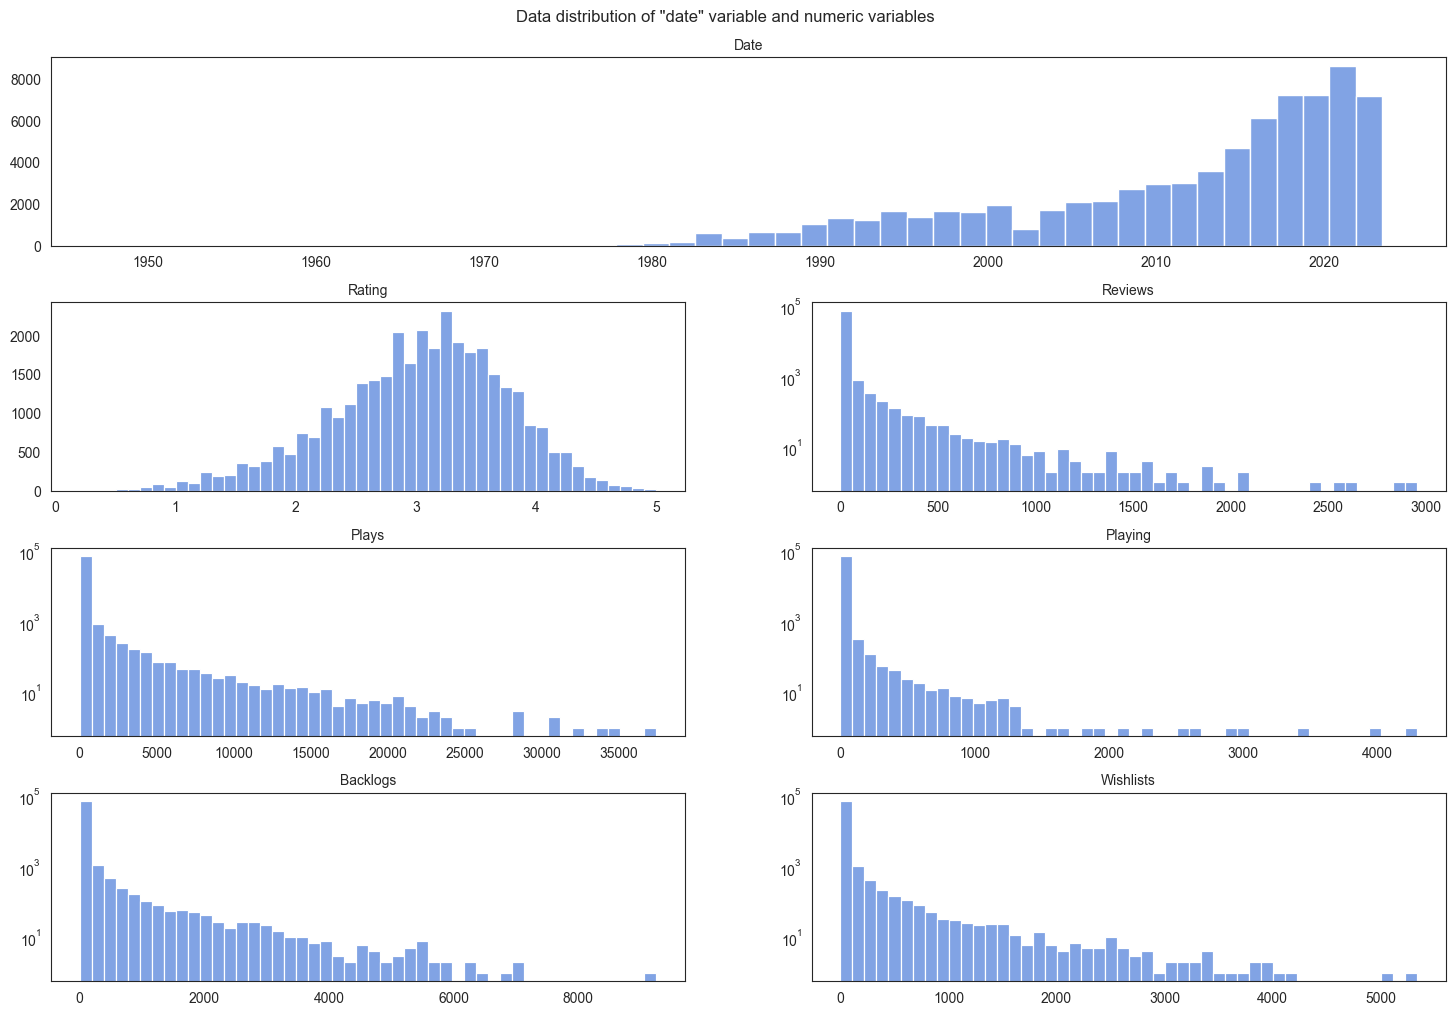

In [35]:
figure, grid = plt.figure(figsize=(18, 12)), GridSpec(4, 2, hspace=0.30)

figure.add_subplot(grid[0, :])
for i in range(1, 4):
    for j in range(2):
        figure.add_subplot(grid[i, j])
        
for i, column in enumerate(["date", "rating", "reviews", "plays", "playing", "backlogs", "wishlists"]):
    log_scale = (False, True) if column not in ["date", "rating"] else (False, False)
    
    sns.histplot(x=df[column], ax=figure.axes[i], bins=48, color=sns.color_palette('hls', 10)[6], log_scale=log_scale)
    figure.axes[i].set_title(column.capitalize(), fontsize='medium')
    figure.axes[i].set_xlabel("")
    figure.axes[i].set_ylabel("")

figure.suptitle('Data distribution of "date" variable and numeric variables', y=0.92);

The histogram shows that these **"rating"** fields follow a distribution law that is **close to normal**. Let"s take a closer look at how the data is distributed in this field. To do this, we will build several **distribution diagrams**.

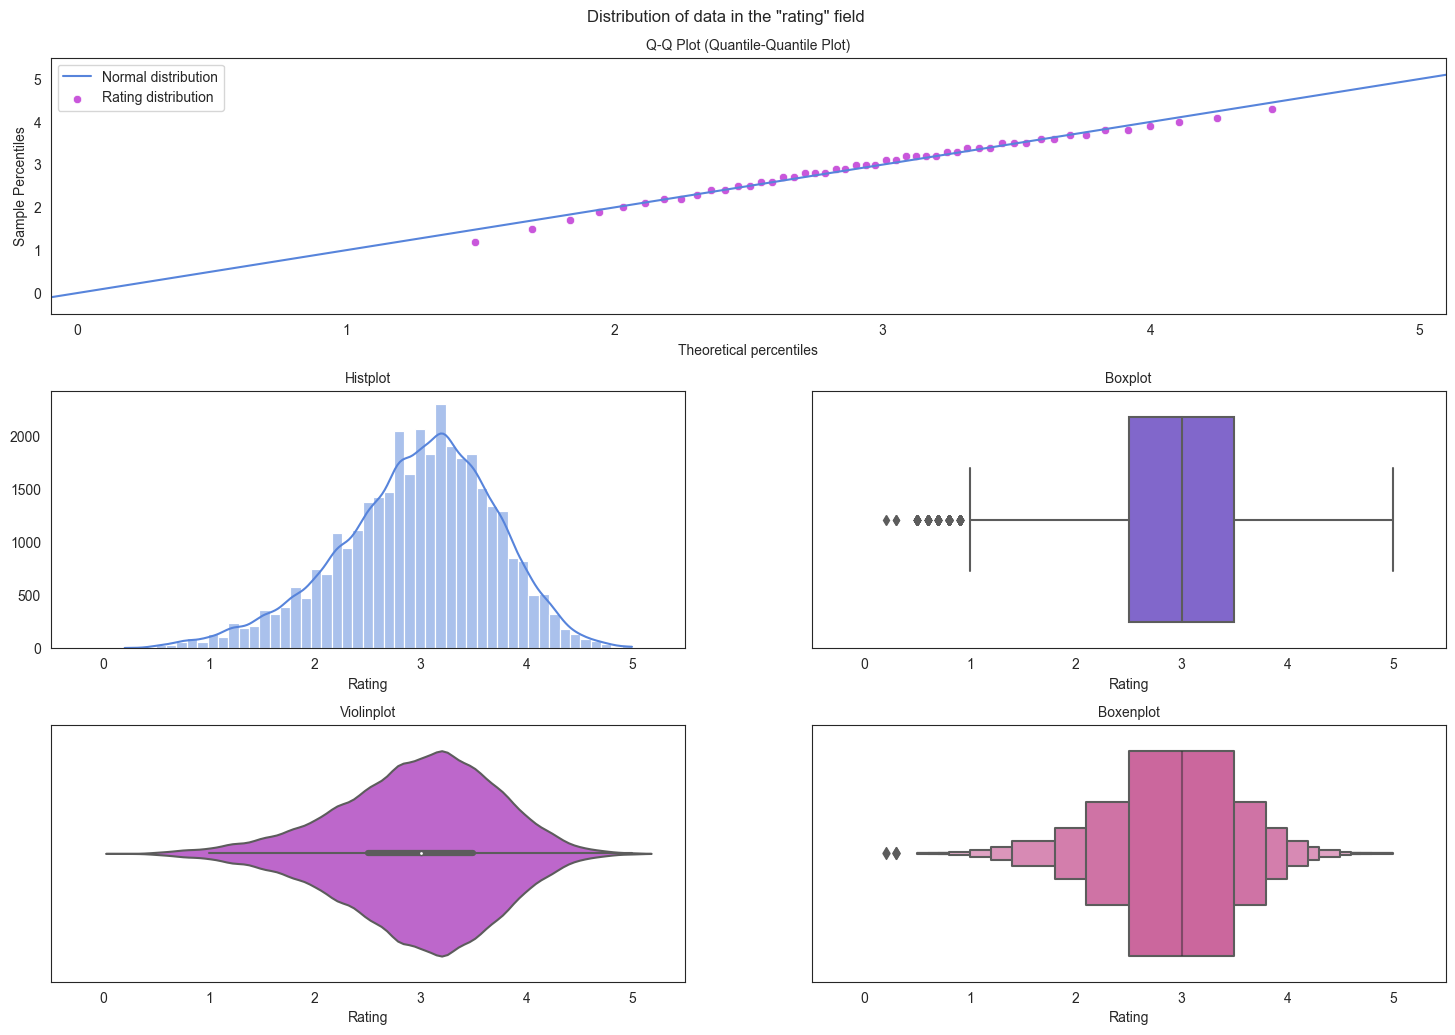

In [36]:
figure, grid = plt.figure(figsize=(18, 12)), GridSpec(3, 2, hspace=0.3)

figure.add_subplot(grid[0, :])
for i in range(1, 3):
    for j in range(2):
        figure.add_subplot(grid[i, j])

rating_distribution = df.loc[df["rating"].notna(), "rating"]
normal_distribution = np.random.normal(rating_distribution.mean(), rating_distribution.std(), rating_distribution.size)
percentiles = np.linspace(0, 100, 51)
rating, normal = np.percentile(rating_distribution, percentiles), np.percentile(normal_distribution, percentiles)

sns.lineplot(x=normal, y=normal, ax=figure.axes[0], label='Normal distribution', color=sns.color_palette('hls', 10)[6])
sns.scatterplot(x=normal, y=rating, ax=figure.axes[0], label='Rating distribution', color=sns.color_palette('hls', 10)[8])

sns.histplot(x=df["rating"], bins=df["rating"].unique().size, kde=True, ax=figure.axes[1], color=sns.color_palette('hls', 10)[6])
sns.boxplot(x=df["rating"], ax=figure.axes[2], color=sns.color_palette('hls', 10)[7])
sns.violinplot(x=df["rating"], ax=figure.axes[3], color=sns.color_palette('hls', 10)[8])
sns.boxenplot(x=df["rating"], ax=figure.axes[4], color=sns.color_palette('hls', 10)[9])

figure.suptitle('Distribution of data in the "rating" field', y=0.92)

figure.axes[0].set_title('Q-Q Plot (Quantile-Quantile Plot)', fontsize='medium')
figure.axes[1].set_title('Histplot', fontsize='medium')
figure.axes[2].set_title('Boxplot', fontsize='medium')
figure.axes[3].set_title('Violinplot', fontsize='medium')
figure.axes[4].set_title('Boxenplot', fontsize='medium')

for i in range(5):
    figure.axes[i].set_xlabel('Rating' if i else 'Theoretical percentiles')
    figure.axes[i].set_ylabel('' if i else 'Sample Percentiles')
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5) if i else (-0.1, 5.1))

figure.axes[0].set_ylim(0, 5)
figure.axes[0].set_ybound((-0.5, 5.5))
figure.axes[0].legend(alignment='left');

**Q-Q Plot** (Quantile-Quantile Plot) allows you to evaluate how close the **data distribution** is to the **normal distribution**. In this graph, you can see that the data distribution of the "rating" field is **very close to a normal distribution**.

The advantage of **boxplot** over **histplot** is that it indicates the **median (Q2) value (which is 3)** and the **interquartile range (IQR) value equal to 1**. This chart also indicates **possible outliers** that are **outside** **Q1 - 1.5IQR** and **Q3 + 1.5IQR** (default). But boxplot has **disadvantages** over histplot because it **does not reflect the distribution of the value**.

Unlike boxplot, in which all chart components correspond to actual data points, **violinplot** uses a **kernel density estimate (kde)** of the underlying distribution, which reflects the **distribution pattern of a quantity**. But keep in mind that **sample size affects the estimation procedure**, and violinplot for relatively small samples can look deceptively smooth.

**boxenplot** unlike boxplot **displays not quartiles, but several quantiles**, which are defined by the "k_depth" parameter. This difference makes it possible to more clearly represent the nature of the distribution of the value. However, the interval \[**Q1 - 1.5IQR**, **Q3 + 1.5IQR**\] is not displayed in boxenplot; outliers are defined by the **outlier_prop** parameter, which specifies the **percentage of data that are considered outliers**.

### <a id=finding_implicit_duplicates>Finding implicit duplicates</a>
***

Let"s check if there are video games with matching values in the "name" and "date" fields.

In [37]:
f'{df[["name", "date"]].duplicated().sum()} - {df[["name", "date"]].duplicated().sum() / df.shape[0]:.1%}'

'0 - 0.0%'

Implicit duplicates **not found**.

### <a id=data_preprocessing_conclusions>Data preprocessing conclusions</a>
***

1. Field names **have not changed**;
2. Data set **does not contain obvious duplicates**;
3. **56165** (**60.9%**) video games **have no user ratings** and **4715** (**5.1%**) video games **have no description**. **95% of video games** that have no rating or description, the values in the "reviews", "plays", "playing", "backlogs" and "wishlists" fields **do not exceed 7**, which may indicate ** obscurity** of these games. Removed **14315** (**15.53%)** entries where each of the "reviews", "plays", "playing", "backlogs" and "wishlists" fields had a value of **0**. **19900** (**21.6%**) video games **have no company data** and **5661** (**6.1%**) video games **have no genre data**. This phenomenon is also associated with the obscurity of video games. **95% of games** with no company or genre data, "reviews", "plays", "playing", "backlogs" and "wishlists" fields **do not exceed 24**. Removed **3017** (**3.27%**) records where each "companies" and "genres" field was **\[ \]**.
4. For the **"date"** field, the data type has been changed to the **"datetime"** type, for fields that have a **numeric data type**, the accuracy has been reduced to **32 bits**, for the fields ** "companies"**, **"platforms"**, **"genres"** data converted to **list** type;
5. An additional field **"indie"** has been created with boolean variables that will display whether this game is an indie game. Removed **"description"** field as it is not needed for this study.
6. Video game **ranking** data follows a **normal distribution** with a **median of 3**. The values ​​in the **"reviews", "plays", "playing", "backlogs", "wishlists"** fields are unevenly distributed, this is due to the large number of little-known and unpopular video games in the dataset.
7. Implicit duplicates **not found**.

Save the processed dataset.

In [38]:
df.to_csv('../data/backloggd/backloggd_processed.csv', sep=',', index=False)

## <a id=data_distribution_analysis>Data distribution analysis</a>
***

### <a id=general_distribution_variables>General distribution variables</a>

#### <a id=video_game_genres>Video game genres</a>

Let"s look at the distribution of games among the **top 10** genres **by number of video games**.

In [39]:
(pd.DataFrame({"values": df.loc[df["category"] == "main", "genres"].explode().value_counts().iloc[:10],
               "ratio": df.loc[df["category"] == "main", "genres"].explode().value_counts().iloc[:10] /
               df.loc[df["category"] == "main", "genres"].count()})
 .style
 .format(lambda x: f"{x:.1%}", subset="ratio"))

,values,ratio
genres,,
Adventure,21986,33.9%
Simulator,10041,15.5%
RPG,9877,15.2%
Strategy,9408,14.5%
Puzzle,8805,13.6%
Shooter,7397,11.4%
Platform,6614,10.2%
Arcade,6495,10.0%
Sport,4810,7.4%


In [40]:
genres = (df
          .loc[df["category"] == "main", ["genres", "indie", "name"]]
          .explode("genres")
          .rename(columns={"indie": "developers", "name": "values"})
          .groupby(["genres", "developers"])
          .count()
          .loc[df.loc[df["category"] == "main", "genres"].explode().value_counts().iloc[:10].index]
          .rename(index={True: 'Indie developers', False: 'Large companies'}, level=1))

for genre in df.loc[df["category"] == "main", "genres"].explode().value_counts().iloc[:10].index:
    total = genres.loc[genre, "values"].sum()
    genres.loc[(genre, 'Large companies'), "ratio"] = genres.loc[(genre, 'Large companies'), "values"] / total
    genres.loc[(genre, 'Indie developers'), "ratio"] = genres.loc[(genre, 'Indie developers'), "values"] / total

(genres
 .style
 .format(lambda x: f"{x:.1%}", subset="ratio"))

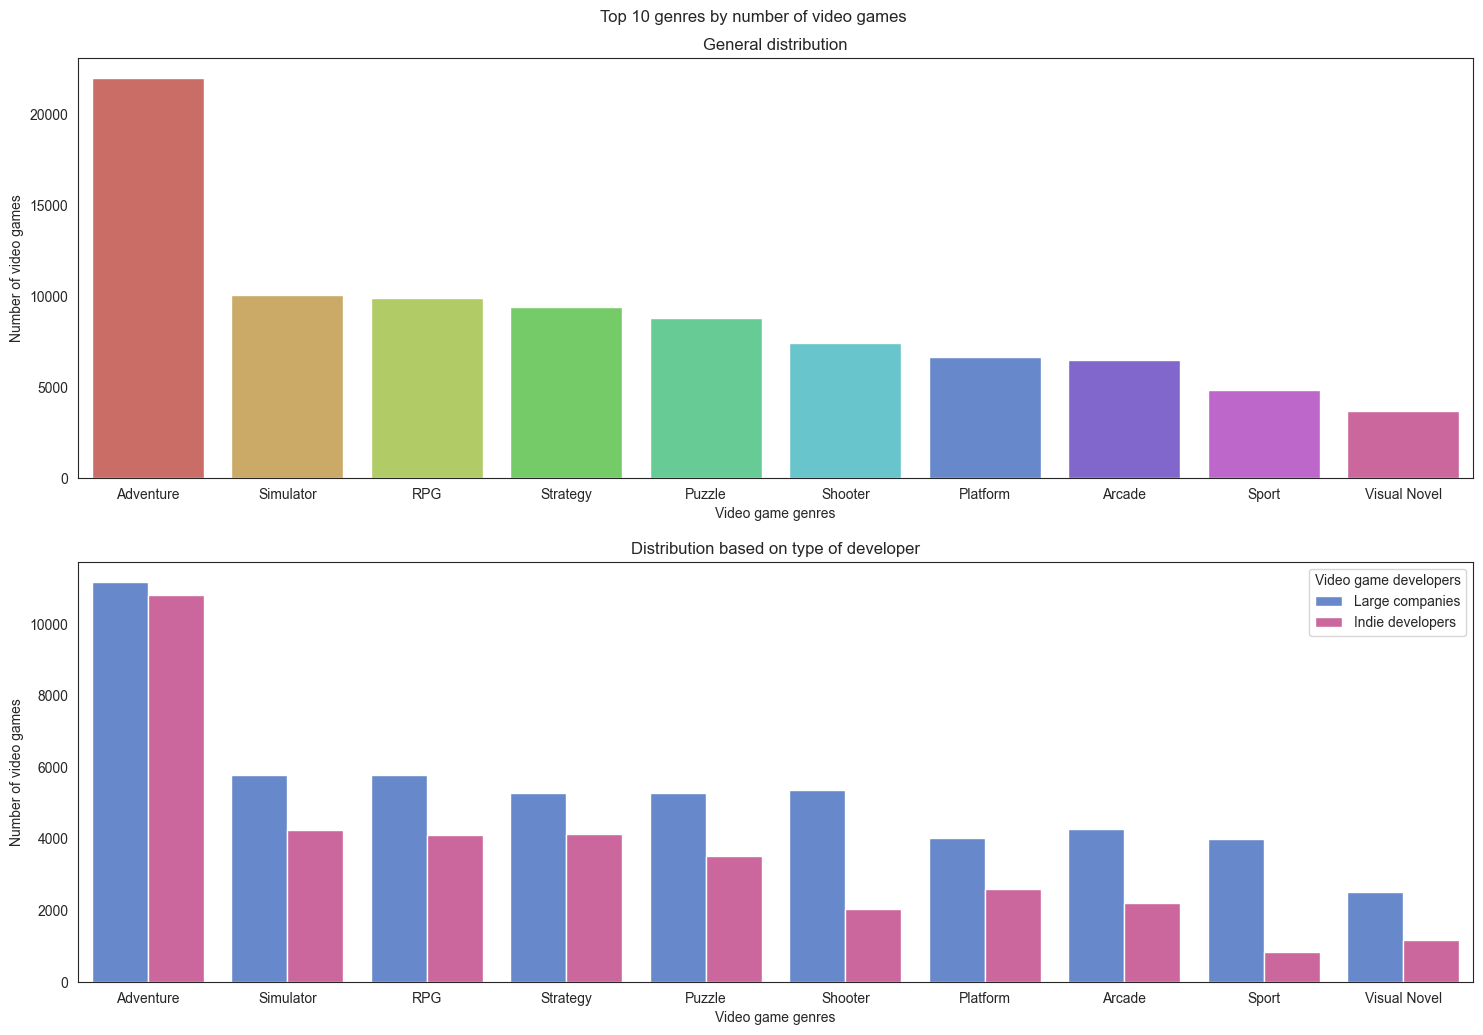

In [41]:
figure, grid = plt.figure(figsize=(18, 12)), GridSpec(2, 1, hspace=0.2)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = df.loc[df["category"] == "main", "genres"].explode().value_counts().iloc[:10]

sns.barplot(x=plot_data.index,
            y=plot_data,
            ax=figure.axes[0],
            palette=sns.color_palette("hls", 10))

plot_data = (df
             .loc[df["category"] == "main", ["genres", "indie", "name"]]
             .explode("genres")
             .rename(columns={"indie": "developers", "name": "values"})
             .groupby(["genres", "developers"])
             .count()
             .loc[df.loc[df["category"] == "main", "genres"].explode().value_counts().iloc[:10].index]
             .rename(index={True: 'Indie developers', False: 'Large companies'}, level=1)
             .reset_index())

sns.barplot(data = plot_data,
            x="genres",
            y="values",
            hue="developers",
            hue_order=['Large companies', 'Indie developers'],
            ax=figure.axes[1],
            palette=sns.color_palette('hls', 10)[6::3])

figure.suptitle('Top 10 genres by number of video games', y=0.92)

for i in range(2):
    figure.axes[i].set_title('General distribution' if not i else 'Distribution based on type of developer')
    figure.axes[i].set_xlabel('Video game genres')
    figure.axes[i].set_ylabel('Number of video games')

figure.axes[1].legend()
figure.axes[1].legend(figure.axes[1].get_legend().legend_handles,
                      ['Large companies', 'Indie developers'],
                      title='Video game developers',
                      loc='upper right',
                      alignment='left');

The top 10 genres by number of video games include: **Adventure**, **Simulator**, **Strategy**, **RPG**, **Puzzle**, **Shooter**, ** Arcade**, **Platform** and **Sport**. Approximately **one in three games** belongs to the **Adventure** genre, which accounts for **33.9%** of video games. Video game genres were split approximately **2 to 3** between large companies and indie developers (60% - large companies, 40% - indie developers), except for the **Adventure** and **Sport** genres. For the **Adventure** genre, the distribution is approximately **1 to 1** (50.9% - large companies, 49.1% - indie developers), for the **Sport** genre - **1 to 4** (82.8% - large companies, 17.2% - indie developers).

#### <a id=publishing_companies>Developers</a>
***

Let"s look at the distribution of video games between **indie developers** and **large companies**.

In [42]:
(pd.DataFrame({"developers": ["Large companies", "Indie developers"],
               "values": df.loc[df["category"] == "main", "indie"].value_counts(),
               "ratio": df.loc[df["category"] == "main", "indie"].value_counts(normalize=True)})
 .set_index("developers")
 .style
 .format(lambda x: f'{x:.1%}', subset="ratio"))

,values,ratio
developers,,
Large companies,42235,65.2%
Indie developers,22559,34.8%


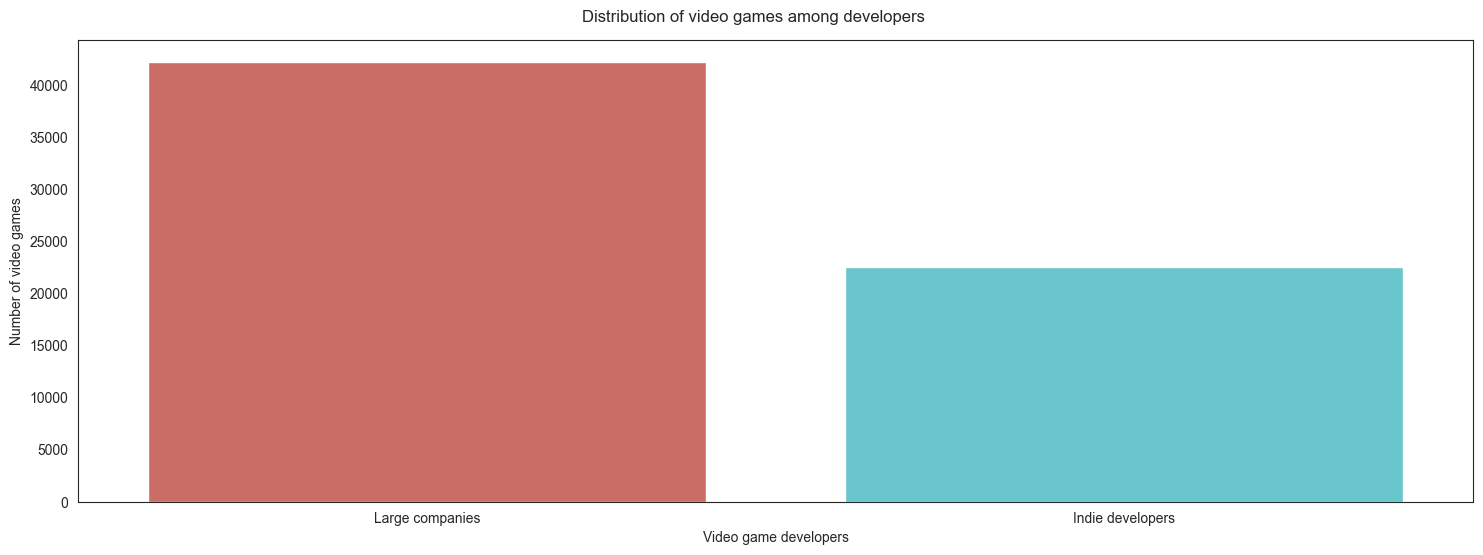

In [43]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

plot_data = (df.loc[df["category"] == "main", "indie"]
             .value_counts()
             .rename(index={False: "Large companies", True:"Indie developers"}))

sns.barplot(x=plot_data.index,
            y=plot_data,
            ax=figure.axes[0],
            palette=sns.color_palette("hls", 2))

figure.suptitle('Distribution of video games among developers', y=0.93)
figure.axes[0].set_xlabel('Video game developers')
figure.axes[0].set_ylabel('Number of video games');

Approximately **2/3** of the market (**65.2%**) is occupied by **large publishers**, the rest (**34.9%**) is occupied by **indie developers**. Let"s look at the distribution of games between the **top 10** indie developers and major companies by number of video games.

In [44]:
(pd.DataFrame({"values": df.loc[(df["category"] == "main") & (~ df["indie"]), "developers"].explode().value_counts().iloc[:10],
               "ratio": df.loc[(df["category"] == "main") & (~ df["indie"]), "developers"].explode().value_counts().iloc[:10] /
               df.loc[df["category"] == "main", "developers"].count()})
 .style
 .format(lambda x: f'{x:.1%}', subset="ratio"))

,values,ratio
developers,,
Nintendo,978,1.5%
Konami,803,1.2%
Sega,752,1.2%
Electronic Arts,576,0.9%
Capcom,462,0.7%
Activision,417,0.6%
Sony Computer Entertainment,372,0.6%
Square Enix,352,0.5%
THQ,326,0.5%


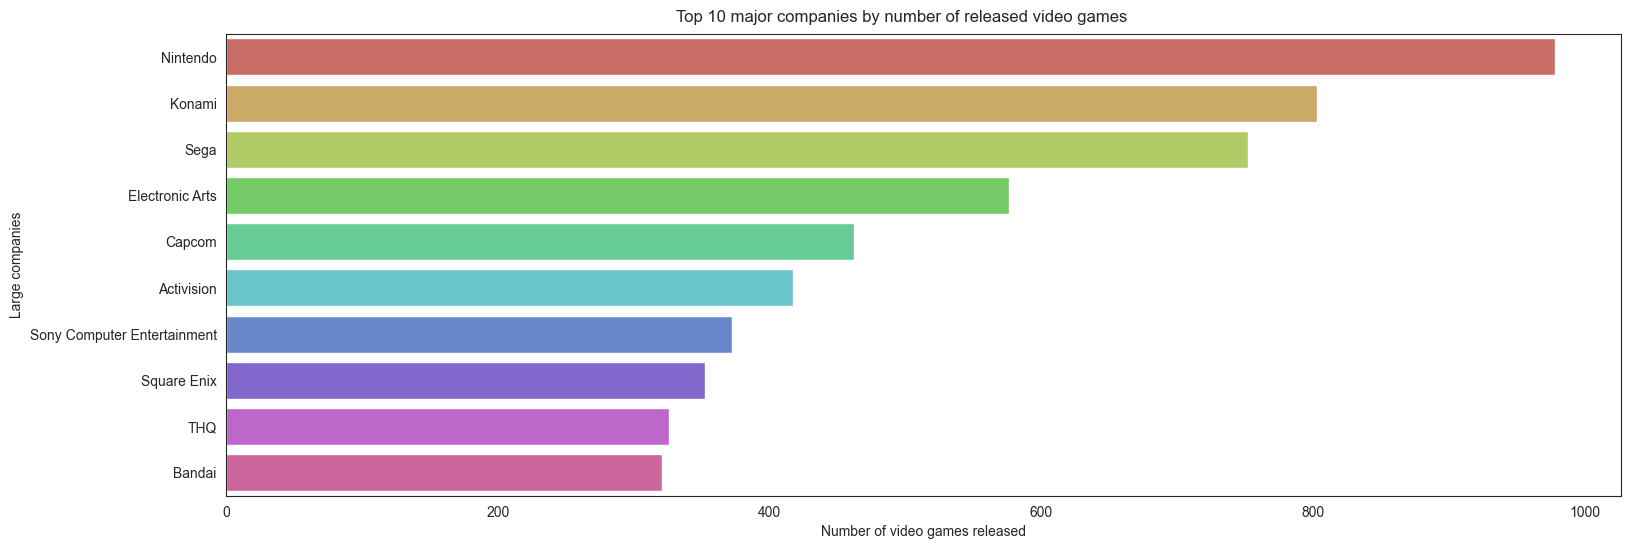

In [45]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

plot_data = df.loc[(df["category"] == "main") & (~ df["indie"]), "developers"].explode().value_counts().iloc[:10]

sns.barplot(x=plot_data,
            y=plot_data.index,
            orient="h",
            ax=figure.axes[0],
            palette=sns.color_palette("hls", 10))

figure.suptitle('Top 10 major companies by number of released video games', y=0.92)
figure.axes[0].set_xlabel('Number of video games released')
figure.axes[0].set_ylabel('Large companies');

The top 10 major companies by number of video games released are: **Nintendo**, **Konami**, **Sega**, **Electronic Arts**, **Capcom**, **Activision**, **Sony Computer Entertainment**, **Square Enix**, **Bandai** and **THQ**. Approximately **1 in 100 games** released by **Nintendo**, **Konami** and **Sega**, these publishers account for **1.5%**, **1.2%** and **1.2%** of released video games respectively.

In [46]:
(pd.DataFrame({"values": df.loc[(df["category"] == "main") & (df["indie"]), "developers"].explode().value_counts().iloc[:10],
               "ratio": df.loc[(df["category"] == "main") & (df["indie"]), "developers"].explode().value_counts().iloc[:10] /
               df.loc[df["category"] == "main", "developers"].count()})
 .style
 .format(lambda x: f'{x:.1%}', subset="ratio"))

,values,ratio
developers,,
Sokpop Collective,92,0.1%
Devolver Digital,90,0.1%
Ratalaika Games,82,0.1%
Sekai Project,80,0.1%
Plug In Digital,77,0.1%
Choice of Games,76,0.1%
EastAsiaSoft,73,0.1%
KISS ltd,71,0.1%
Sometimes You,71,0.1%


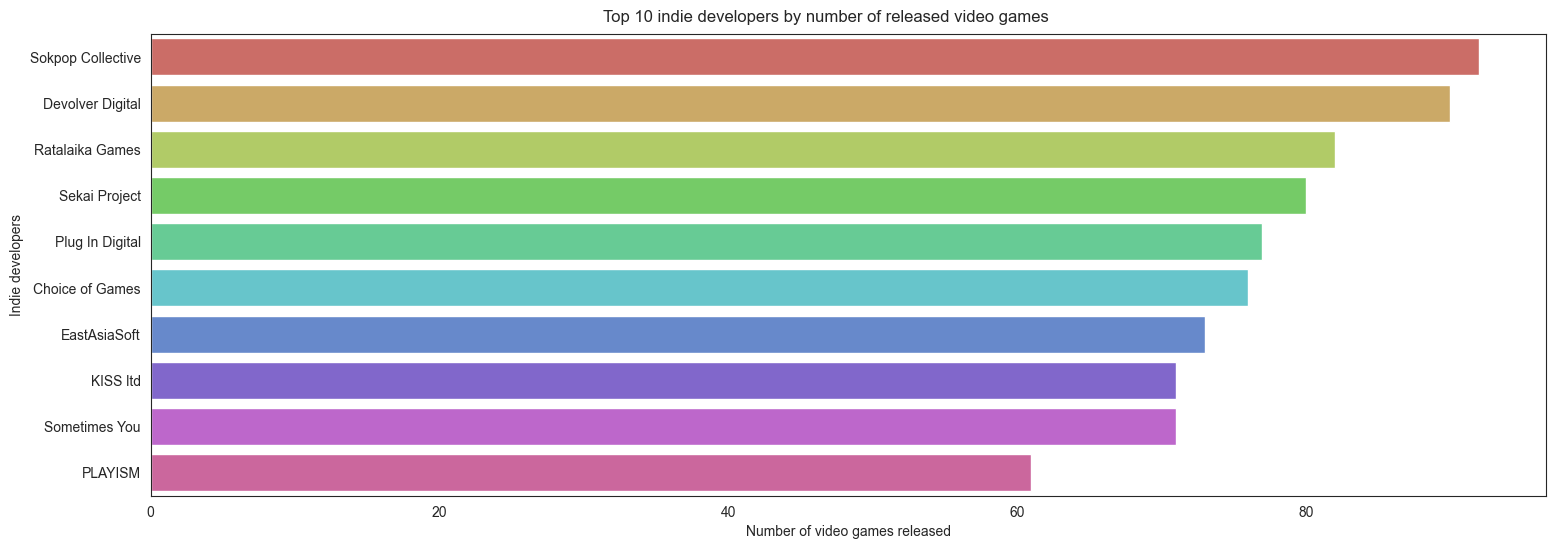

In [47]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

plot_data = df.loc[(df["category"] == "main") & (df["indie"]), "developers"].explode().value_counts().iloc[:10]

sns.barplot(x=plot_data,
            y=plot_data.index,
            orient="h",
            ax=figure.axes[0],
            palette=sns.color_palette("hls", 10))

figure.suptitle('Top 10 indie developers by number of released video games', y=0.92)
figure.axes[0].set_xlabel('Number of video games released')
figure.axes[0].set_ylabel('Indie developers');

The top 10 indie developers by video game releases are: **Sokpop Collective**, **Devolver Digital**, **Plug In Digital**, **Ratalaika Games**, **Sekai Project**, **Choice of Games**, **Sometimes You**, **KISS ltd**, **EastAsiaSoft** and **PLAYISM**. For each indie developer, the **share of released games** is **no more than 0.15%**.

#### <a id=gaming_platforms>Gaming platforms</a>
***

Let"s look at the distribution of games among the **top 10** gaming platforms **by number of released games**.

In [48]:
(pd.DataFrame({"values": df.loc[df["category"] == "main", "platforms"].explode().value_counts().iloc[:10],
               "ratio": df.loc[df["category"] == "main", "platforms"].explode().value_counts().iloc[:10] /
               df.loc[df["category"] == "main", "platforms"].count()})

 .style
 .format(lambda x: f'{x:.1%}', subset="ratio"))

,values,ratio
platforms,,
Windows PC,37194,57.4%
Mac,10239,15.8%
Nintendo Switch,6463,10.0%
Linux,6324,9.8%
PlayStation 4,6044,9.3%
iOS,5856,9.0%
Android,4849,7.5%
Xbox One,4720,7.3%
Web browser,3040,4.7%


In [49]:
genres = (df
          .loc[df["category"] == "main", ["platforms", "indie", "name"]]
          .explode("platforms")
          .rename(columns={"indie": "developers", "name": "values"})
          .groupby(["platforms", "developers"])
          .count()
          .loc[df.loc[df["category"] == "main", "platforms"].explode().value_counts().iloc[:10].index]
          .rename(index={True: 'Indie developers', False: 'Large companies'}, level=1))

for genre in df.loc[df["category"] == "main", "platforms"].explode().value_counts().iloc[:10].index:
    total = genres.loc[genre, "values"].sum()
    genres.loc[(genre, 'Large companies'), "ratio"] = genres.loc[(genre, "Large companies"), "values"] / total
    genres.loc[(genre, 'Indie developers'), "ratio"] = genres.loc[(genre, "Indie developers"), "values"] / total

(genres
 .style
 .format(lambda x: f'{x:.1%}', subset="ratio"))

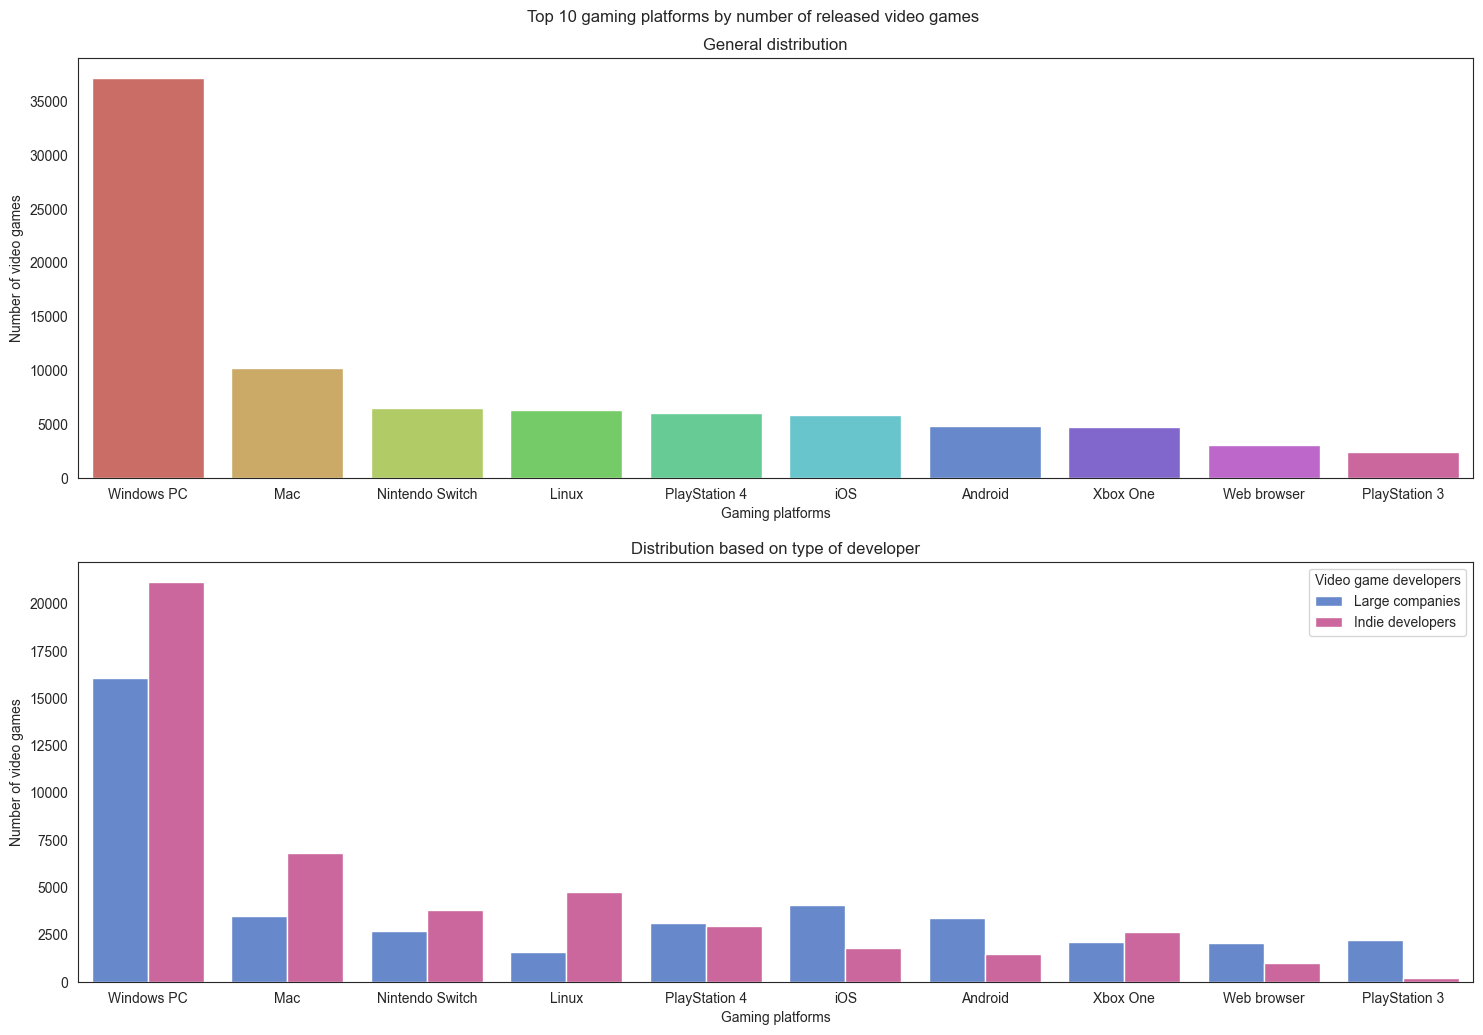

In [50]:
figure = plt.figure(figsize=(18, 12))
grid = GridSpec(2, 1, hspace=0.20)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])

plot_data = df.loc[df["category"] == "main", "platforms"].explode().value_counts().iloc[:10]

sns.barplot(x=plot_data.index,
            y=plot_data,
            ax=figure.axes[0],
            palette=sns.color_palette("hls", 10))

plot_data = (df
             .loc[df["category"] == "main", ["platforms", "indie", "name"]]
             .explode("platforms")
             .rename(columns={"indie": "developers", "name": "values"})
             .groupby(["platforms", "developers"])
             .count()
             .loc[df.loc[df["category"] == "main", "platforms"].explode().value_counts().iloc[:10].index]
             .rename(index={True: 'Indie developers', False: 'Large companies'}, level=1)
             .reset_index())

sns.barplot(data = plot_data,
            x="platforms",
            y="values",
            hue="developers",
            hue_order=['Large companies', 'Indie developers'],
            ax=figure.axes[1],
            palette=sns.color_palette("hls", 10)[6::3])

figure.suptitle('Top 10 gaming platforms by number of released video games', y=0.92)
for i in range(2):
    figure.axes[i].set_title('General distribution' if not i else 'Distribution based on type of developer')
    figure.axes[i].set_xlabel('Gaming platforms')
    figure.axes[i].set_ylabel('Number of video games')

figure.axes[1].legend()
figure.axes[1].legend(figure.axes[1].get_legend().legend_handles,
                      ['Large companies', 'Indie developers'],
                      title='Video game developers',
                      loc='upper right',
                      alignment='left');

The top 10 gaming platforms by number of video games released are: **Windows PC**, **Mac**, **Nintendo Switch**, **Linux**, **iOS**, **PlayStation 4 **, **Android**, **Xbox One**, **Web browser** and **PlayStation 3**. Approximately **1 in 2 games** are released for the **Windows PC** platform, accounting for **57.4%** of video games released. Game platforms are unevenly distributed between large companies and indie developers, on **iOS**, **Android**, **Web browser** and **PlayStation 3** platforms, the largest number of video games belongs to **large companies**, on **Windows PC**, **Mac**, **Nintendo Switch** and **Linux** platforms - **indie developers**. The **PlayStation 4** and **Xbox One** platforms have approximately the same number of large companies and indie developers.

#### <a id=release_categories>Release categories</a>
***

In [51]:
(pd.DataFrame({"values": df["category"].value_counts(),
               "ratio": df["category"].value_counts(normalize=True)})
 .style
 .format(lambda x: f'{x:.1%}', subset="ratio"))

,values,ratio
category,,
main,64794,86.6%
port,2463,3.3%
dlc,2221,3.0%
mod,1761,2.4%
expanded,830,1.1%
expansion,827,1.1%
remake,666,0.9%
remaster,601,0.8%
pack,410,0.5%


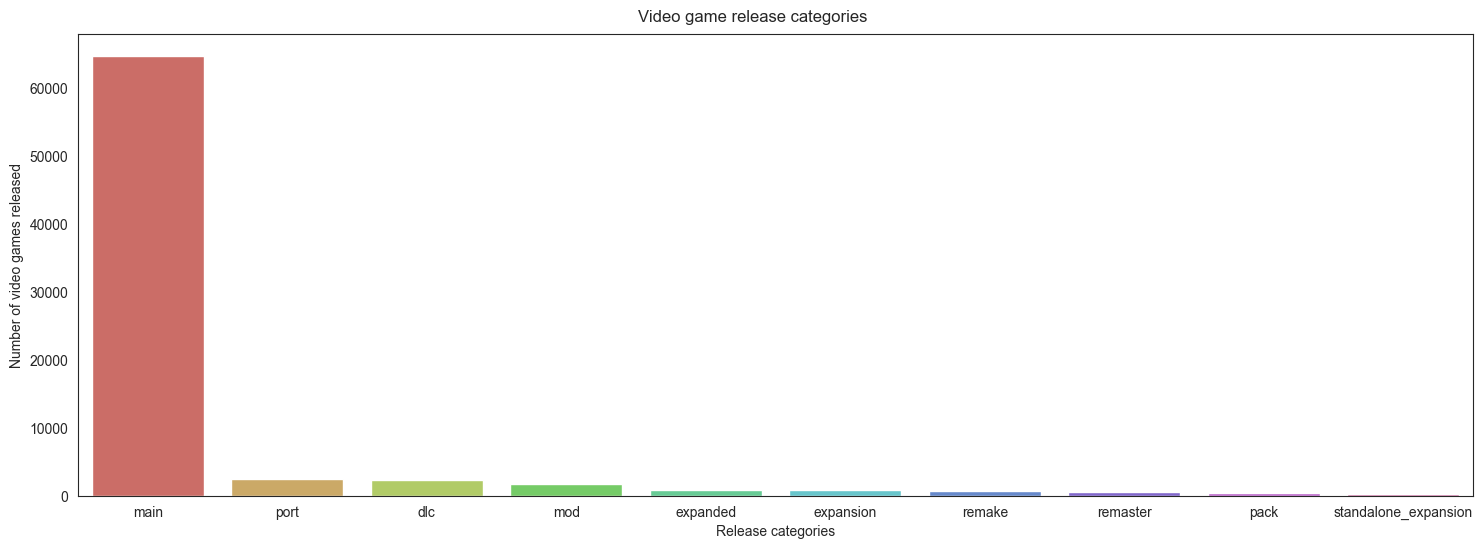

In [52]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

sns.barplot(x=df["category"].value_counts().index,
            y=df["category"].value_counts(),
            ax=figure.axes[0],
            palette=sns.color_palette("hls", 10))

figure.suptitle('Video game release categories', y=0.92)
figure.axes[0].set_xlabel('Release categories')
figure.axes[0].set_ylabel('Number of video games released');

The largest number of video games, **86.0%**, is a **major release**.

#### <a id=release_date>Release date</a>
***

In [53]:
(pd.DataFrame({
    "empty": df["date"].dt.month.value_counts(),
    "ratio": df["date"].dt.month.value_counts(normalize=True)})
 .style
 .format({"ratio": lambda x: f"{x:.1%}"}))

,empty,ratio
date,,
12,11562,15.5%
10,7009,9.4%
11,6835,9.1%
3,6074,8.1%
9,5919,7.9%
2,5554,7.4%
6,5499,7.3%
4,5488,7.3%
8,5398,7.2%


In [54]:
(pd.DataFrame({
    "empty": df["date"].dt.day.value_counts(),
    "ratio": df["date"].dt.day.value_counts(normalize=True)})
 .style
 .format({"ratio": lambda x: f"{x:.1%}"}))

,empty,ratio
date,,
31,6892,9.2%
1,6169,8.2%
30,2550,3.4%
28,2502,3.3%
25,2452,3.3%
15,2422,3.2%
26,2348,3.1%
20,2333,3.1%
27,2315,3.1%


In [55]:
(pd.DataFrame({
    "empty": df["date"].dt.weekday.value_counts(),
    "ratio": df["date"].dt.weekday.value_counts(normalize=True)})
 .style
 .format({"ratio": lambda x: f'{x:.1%}'}))

,empty,ratio
date,,
3,17872,23.9%
4,14958,20.0%
1,13237,17.7%
2,10061,13.4%
0,8637,11.5%
5,5274,7.0%
6,4782,6.4%


In [56]:
df["date"].dt.month.astype('int').value_counts().sort_index().reset_index()

,date,count
0,1,4796
1,2,5554
2,3,6074
3,4,5488
4,5,5320
5,6,5499
6,7,5367
7,8,5398
8,9,5919
9,10,7009


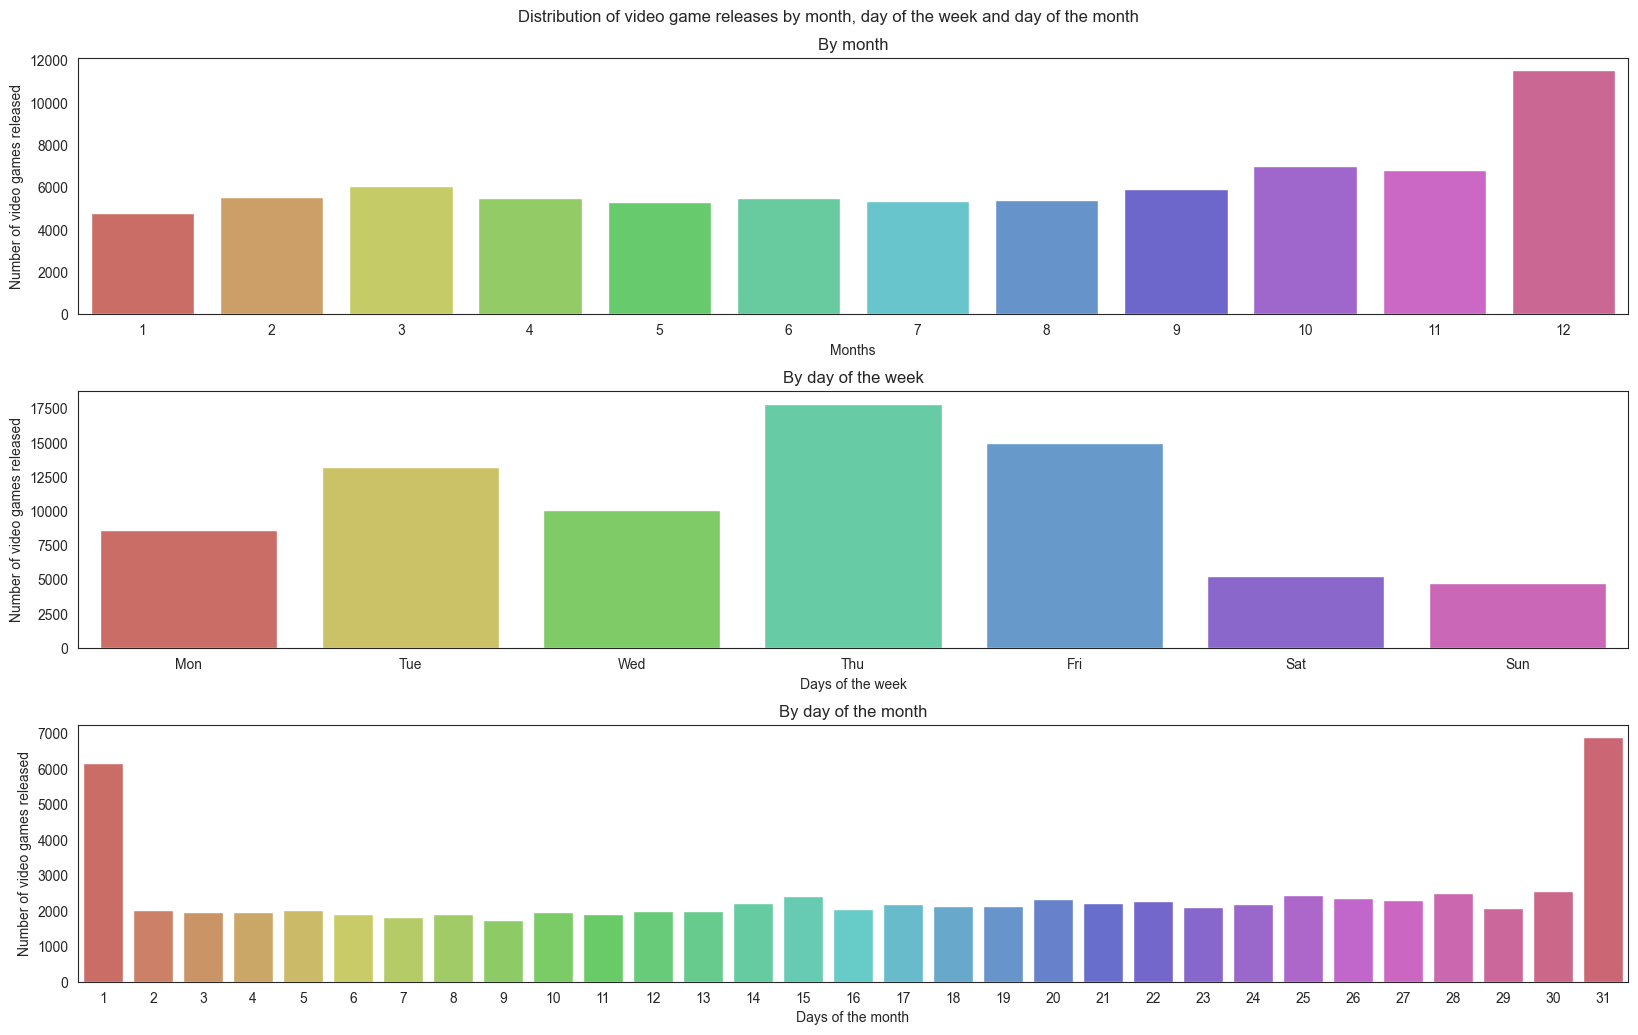

In [57]:
figure = plt.figure(figsize=(20, 12))
grid = GridSpec(3, 1, hspace=0.3)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[2, 0])

plot_data = (df["date"]
             .dt.month
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(data=plot_data,
            x="date", 
            y="count", 
            ax=figure.axes[0], 
            palette=sns.color_palette("hls", 12))

plot_data = (df["date"]
             .dt.weekday
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index()
             .replace({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}))

sns.barplot(data=plot_data,
            x="date", 
            y="count",
            ax=figure.axes[1], 
            palette=sns.color_palette('hls', 7))

plot_data = (df["date"]
             .dt.day
             .astype('int')
             .value_counts()
             .sort_index()
             .reset_index())

sns.barplot(data=plot_data,
            x="date", 
            y="count",
            ax=figure.axes[2], 
            palette=sns.color_palette('hls', 31))

figure.suptitle('Distribution of video game releases by month, day of the week and day of the month', y=0.92)

for i in range(3):
    figure.axes[i].set_title({0: 'By month', 1: 'By day of the week', 2: 'By day of the month'}[i])
    figure.axes[i].set_xlabel({0: 'Months', 1: 'Days of the week', 2: 'Days of the month'}[i])
    figure.axes[i].set_ylabel('Number of video games released')

Most **often** games were released in **December** (15.5%), on the **first** (9.2%) or **last** (8.2%) days of the month. Approximately **1 in 6** games were released in December, **1 in 10** on the 1st or 31st.

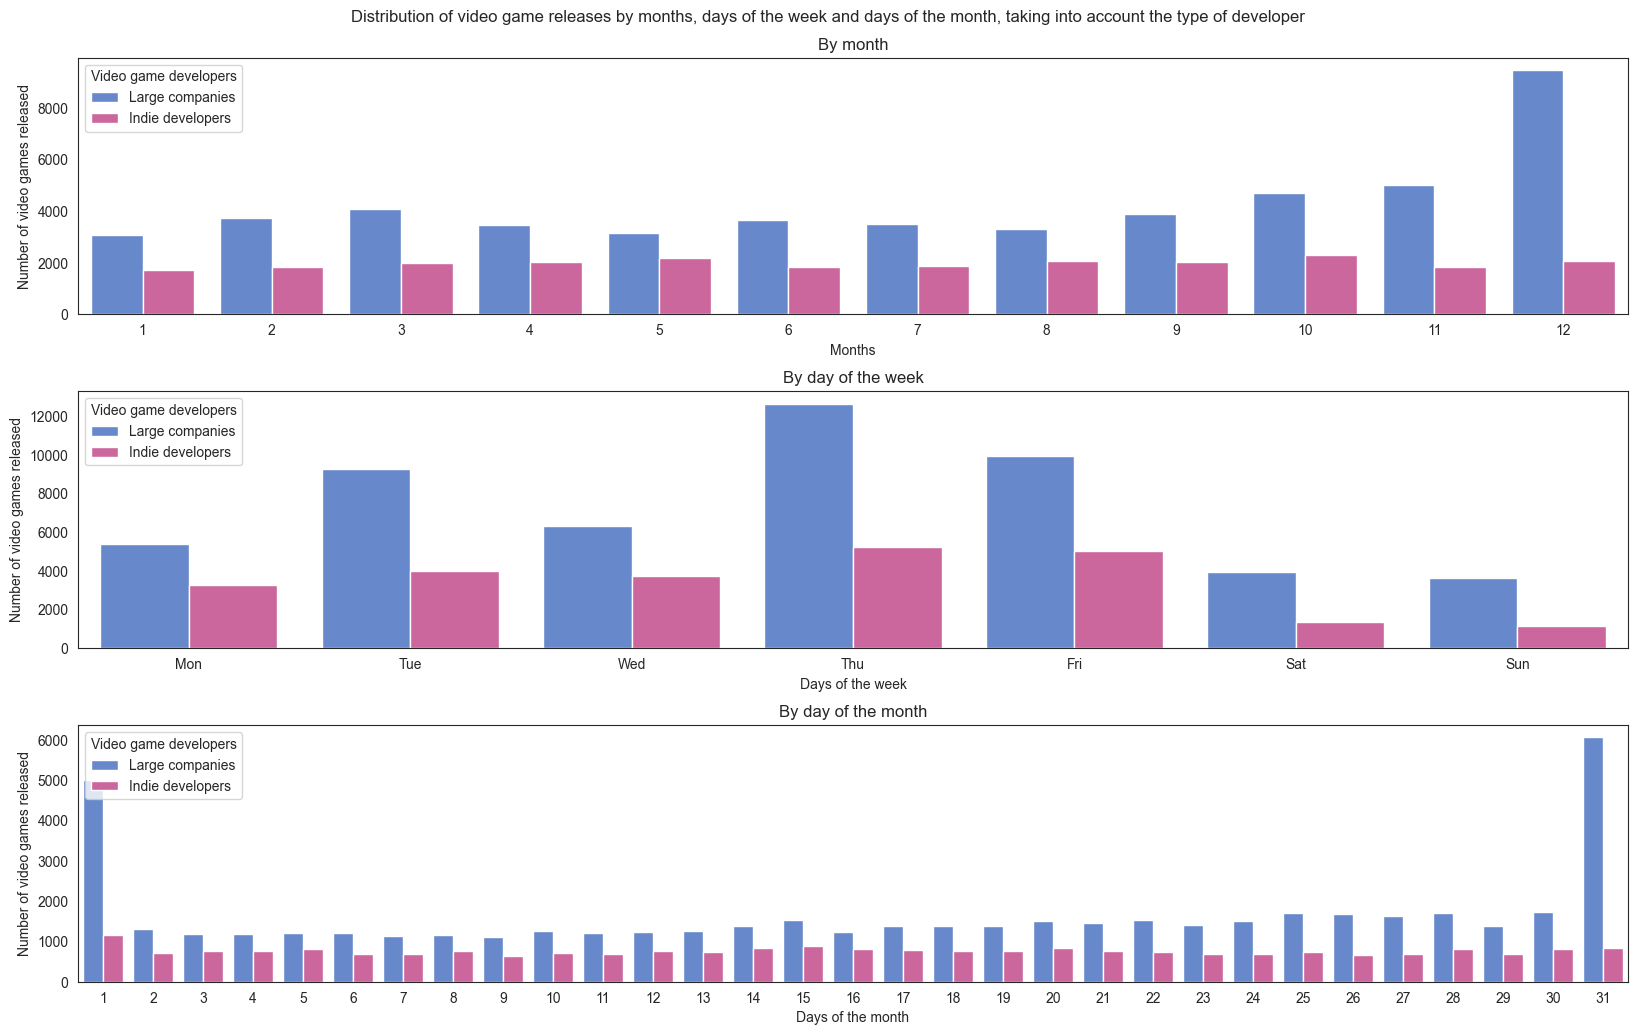

In [58]:
figure = plt.figure(figsize=(20, 12))
grid = GridSpec(3, 1, hspace=0.3)

figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[2, 0])

plot_data = (df[["date", "indie", "name"]]
             .apply(lambda x: [int(x["date"].month), x["indie"], x["name"]], axis=1, result_type='expand')
             .rename(columns={0: 'month', 1: 'indie', 2: 'count'})
             .groupby(["month", "indie"])
             .count()
             .reset_index())

sns.barplot(data=plot_data,
            x="month", 
            y="count",
            hue="indie",
            hue_order=[False, True],
            ax=figure.axes[0], 
            palette=sns.color_palette('hls', 10)[6::3])

plot_data = (df[["date", "indie", "name"]]
             .apply(lambda x: [int(x["date"].weekday()), x["indie"], x["name"]], axis=1, result_type="expand")
             .rename(columns={0: "weekday", 1: "indie", 2: "count"})
             .groupby(["weekday", "indie"])
             .count()
             .reset_index()
             .replace({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}))

sns.barplot(data=plot_data,
            x="weekday", 
            y="count",
            hue="indie",
            hue_order=[False, True],
            ax=figure.axes[1], 
            palette=sns.color_palette('hls', 10)[6::3])

plot_data = (df[["date", "indie", "name"]]
             .apply(lambda x: [int(x["date"].day), x["indie"], x["name"]], axis=1, result_type="expand")
             .rename(columns={0: 'day', 1: 'indie', 2: 'count'})
             .groupby(["day", "indie"])
             .count()
             .reset_index())

sns.barplot(data=plot_data,
            x="day", 
            y="count",
            hue="indie",
            hue_order=[False, True],
            ax=figure.axes[2], 
            palette=sns.color_palette("hls", 10)[6::3])

figure.suptitle('Distribution of video game releases by months, '
                'days of the week and days of the month, '
                'taking into account the type of developer', y=0.92)

for i in range(3):
    figure.axes[i].set_title({0: 'By month', 1: 'By day of the week', 2: 'By day of the month'}[i])
    figure.axes[i].set_xlabel({0: 'Months', 1: 'Days of the week', 2: 'Days of the month'}[i])
    figure.axes[i].set_ylabel("Number of video games released")
    figure.axes[i].legend()
    figure.axes[i].legend(figure.axes[i].get_legend().legend_handles,
                          ['Large companies', 'Indie developers'],
                          title='Video game developers',
                          loc='upper left',
                          alignment='left')

If we separately consider large-companies and indie-developers, then for **large companies** the above distribution of video game releases **is preserved**. For **Indie Developers**, distribution of video game releases is **even** except for days of the week.

#### <a id=conclusions_data_distribution_analysis>Intermediate conclusions</a>
***

1. The top 10 genres by number of video games are: **Adventure**, **Simulator**, **Strategy**, **RPG**, **Puzzle**, **Shooter**, **Arcade**, **Platform** and **Sport**. Approximately **1 in 3 games** are in the **Adventure** genre, which accounts for **33.93%** of video games. Video game genres were split approximately **2 to 3** between large companies and indie developers (60% - large companies, 40% - indie developers), except for the **Adventure** and **Sport** genres. For the **Adventure** genre, the distribution is approximately **1 to 1** (50.87% - large companies, 49.13% - indie developers), for the **Sport** genre - **1 to 4** (82.79% - large companies, 17.21% - indie developers).
2. Approximately **2/3** of the market (**65.18%**) is occupied by **large publishers**, the rest (**34.82%**) is occupied by **indie developers**. The top 10 major publishers by number of video games released are: **Nintendo**, **Konami**, **Sega**, **Electronic Arts**, **Capcom**, **Activision** , **Sony Computer Entertainment**, **Square Enix**, **Bandai** and **THQ**. Approximately **1 in 100 games** released by **Nintendo**, **Konami** and **Sega**, these publishers account for **1.5%**, **1.2%** and **1.2%** of released video games respectively. The top 10 indie developers by number of released video games are: **Sokpop Collective**, **Devolver Digital**, **Plug In Digital**, **Ratalaika Games**, **Sekai Project**, **Choice of Games**, **Sometimes You**, **KISS ltd**, **EastAsiaSoft** and **PLAYISM**. For each indie developer, the **share of released games** is **no more than 0.15%**.
3. Top 10 by number of released video games are the following platforms: **Windows PC**, **Mac**, **Nintendo Switch**, **Linux**, **iOS**, **PlayStation 4 **, **Android**, **Xbox One**, **Web browser** and **PlayStation 3**. Approximately **1 in 2 games** are released for the **Windows PC** platform, accounting for **57.4%** of released video games respectively. Game platforms are unevenly distributed between large companies and indie developers, on **iOS**, **Android**, **Web browser** and **PlayStation 3** platforms, the largest number of video games belongs to **large companies**, on **Windows PC**, **Mac**, **Nintendo Switch** and **Linux** platforms - **indie developers**. The **PlayStation 4** and **Xbox One** platforms have approximately the same number of large companies and indie developers.
4. Most video games - **86.00%**, is a **major release**.
5. Most **often** games were released in **December** (15.5%), on the **first** (9.2%) or **last** (8.2%) days of the month. Approximately **1 in 6** games were released in December, **1 in 10** on the 1st or 31st. If we separately consider large-companies and indie-developers, then for **large companies** the above distribution of video game releases **is preserved**. For **Indie Developers**, distribution of video game releases is **even** except for days of the week.

### <a id=video_game_rating_distribution>Video game rating distribution</a>
***

#### <a id=rating_distribution_by_genres>By genres</a>
***

Let's see how the rating is distributed among the **top 10 genres by the number of released video games**.

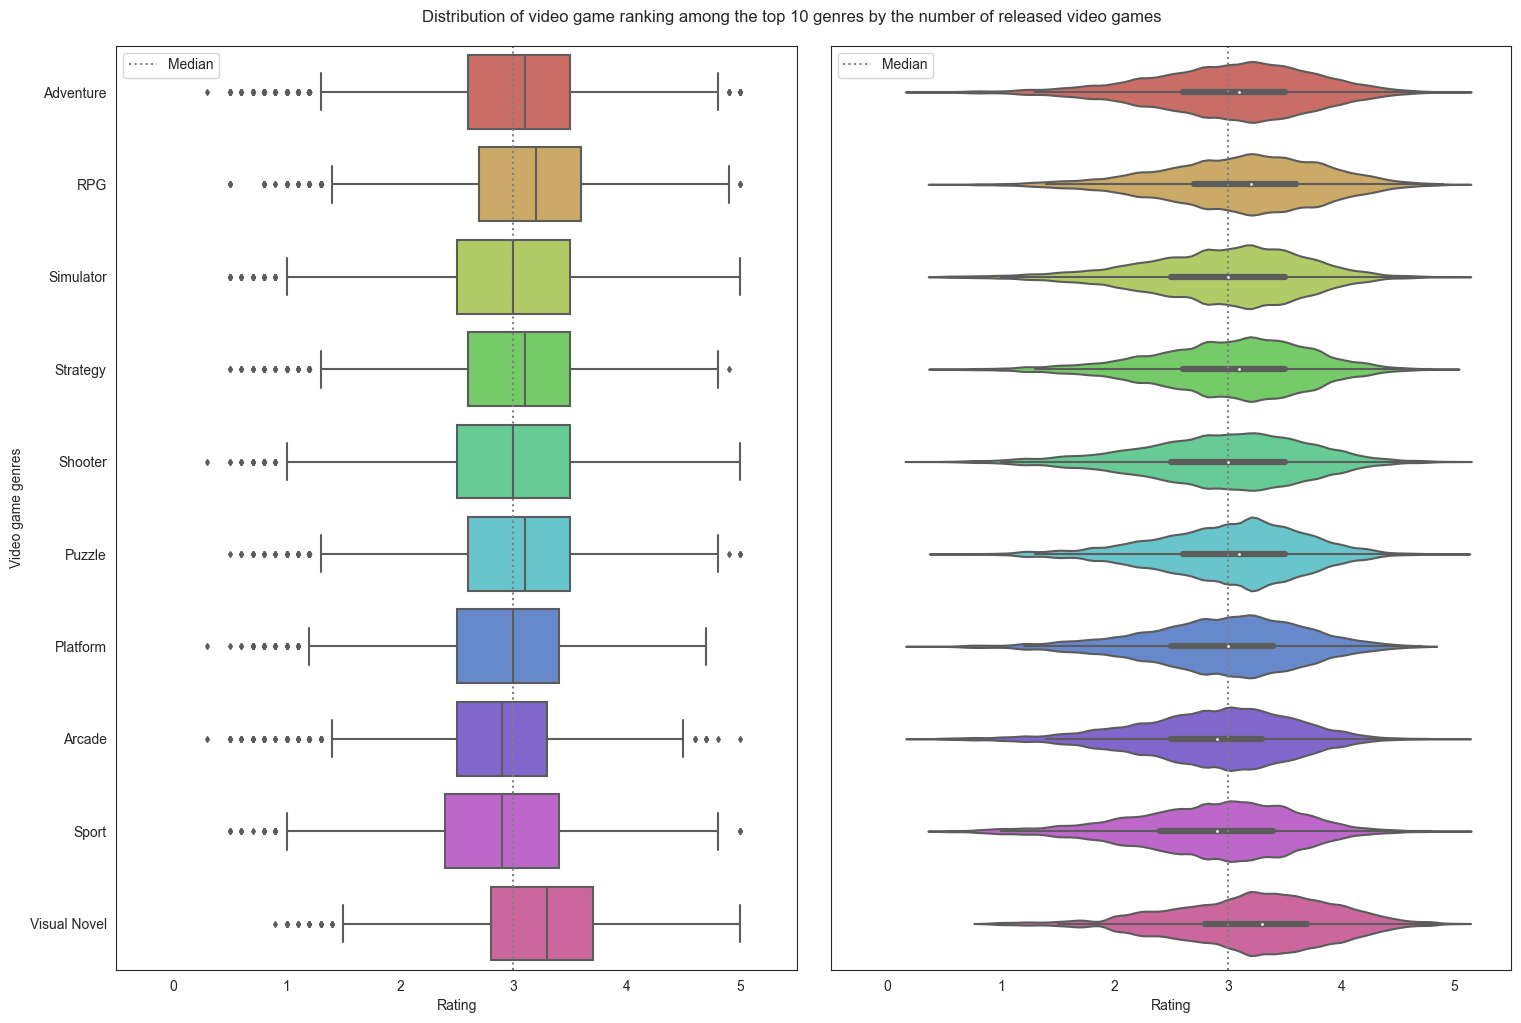

In [59]:
figure, grid = plt.figure(figsize=(18, 12)),  GridSpec(1, 2, wspace=0.05)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column="genres")
genres = df.loc[:, "genres"].explode().value_counts().iloc[:10]

plot_data = (data
             .loc[data["genres"].isin(genres.index), ["rating", "genres"]]
             .reset_index(drop=True)
             .sort_values(by="genres", key=lambda x: genres.rank()[x], ascending=False))

sns.boxplot(data=plot_data,
            x="rating",
            y="genres",
            ax=figure.axes[0],
            palette=sns.color_palette('hls', 10), 
            fliersize=3)

sns.violinplot(data=plot_data,
               x="rating",
               y="genres",
               bw=.1,
               ax=figure.axes[1],
               palette=sns.color_palette("hls", 10))

figure.suptitle('Distribution of video game ranking among the top 10 genres by the number of released video games', y=0.91)
for i in [0, 1]:
    figure.axes[i].axvline(x=3, color='grey', linestyle=":", label="Median")
    figure.axes[i].set_xlabel('Rating')
    figure.axes[i].set_ylabel('Video game genres' if not i else "")
    figure.axes[i].legend(loc='upper left')
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5))
    figure.axes[1].set_yticklabels([])

It can be seen from the graphs that the ranking among the top 10 genres by the number of video games is distributed **normally and evenly**, with slight deviations from the median. The largest and only deviation from the median **to the left** is observed in the **"Sport"** genre. The largest deviation from the median **to the right** is observed in the **"Visual Novel"** genre. Let's see how the data is distributed, **taking into account the type of developer**.

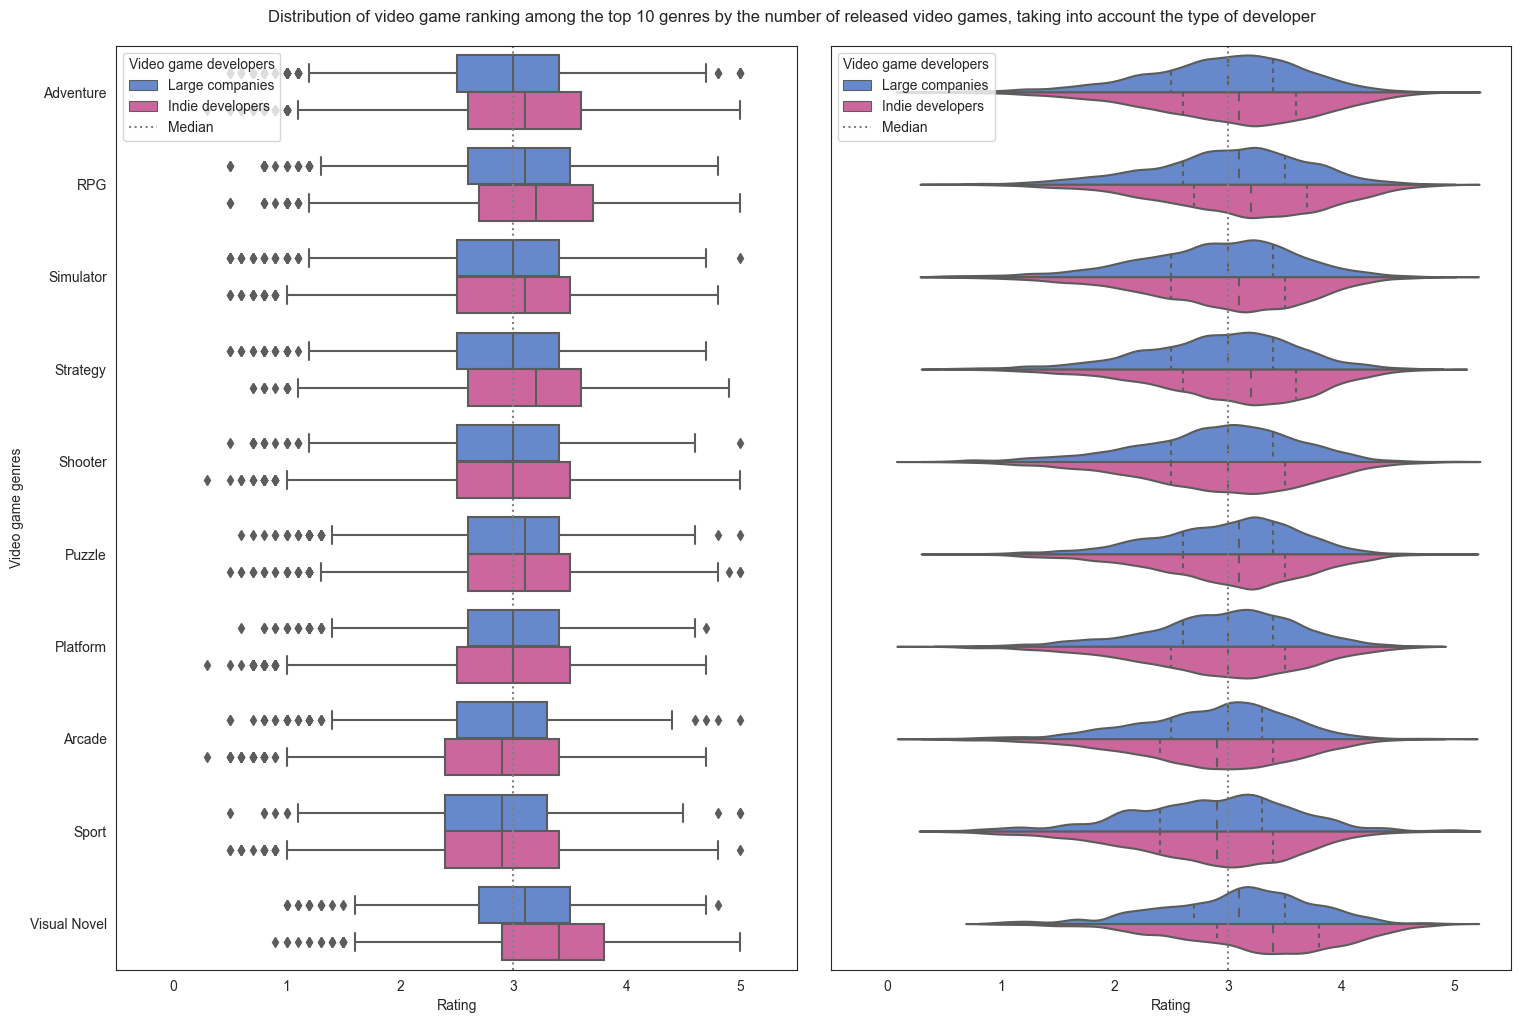

In [60]:
figure = plt.figure(figsize=(18, 12))
grid = GridSpec(1, 2, wspace=0.05)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column="genres")
genres = df.loc[:, "genres"].explode().value_counts().iloc[:10]

plot_data = (data
             .loc[data["genres"].isin(genres.index), ["rating", "genres", "indie"]]
             .reset_index(drop=True)
             .sort_values(by="genres", key=lambda x: genres.rank()[x], ascending=False))

sns.boxplot(data=plot_data,
            x="rating",
            y="genres",
            hue="indie",
            hue_order=[True, False],
            ax=figure.axes[0],
            palette=sns.color_palette('hls', 10)[6::3])

sns.violinplot(data=plot_data,
               x="rating",
               y="genres",
               hue="indie",
               hue_order=[True, False],
               split=True,
               bw=.15,
               inner = 'quartile', 
               ax=figure.axes[1],
               palette=sns.color_palette('hls', 10)[6::3], 
               fliersize=3)

figure.suptitle('Distribution of video game ranking among the top 10 genres by the number of released video games, '
                'taking into account the type of developer', y=0.91)
for i in [0, 1]:
    figure.axes[i].axvline(x=3, color='grey', linestyle=':', label='Median')
    figure.axes[i].set_xlabel("Rating")
    figure.axes[i].set_ylabel('Video game genres' if not i else "")
    figure.axes[i].legend()
    figure.axes[i].legend(figure.axes[i].get_legend().legend_handles, 
                          ['Large companies', 'Indie developers', 'Median'],
                          title='Video game developers', 
                          loc='upper left', 
                          alignment='left')
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5))
    figure.axes[1].set_yticklabels([])

Looking at the data by type of developer, you can see that **large publishers** across all genres except **"Shooter"**, **"Platform"**, and **"Arcade"**, the video game ranking median is **to the right** of the indie developer ranking median. The biggest difference is in the **"Visual Novel"** genre (approximately **0.2**).

#### <a id=rating_distribution_by_publishing_companies>By developers</a>
***

Let's see how the rating is distributed between large companies and indie developers.

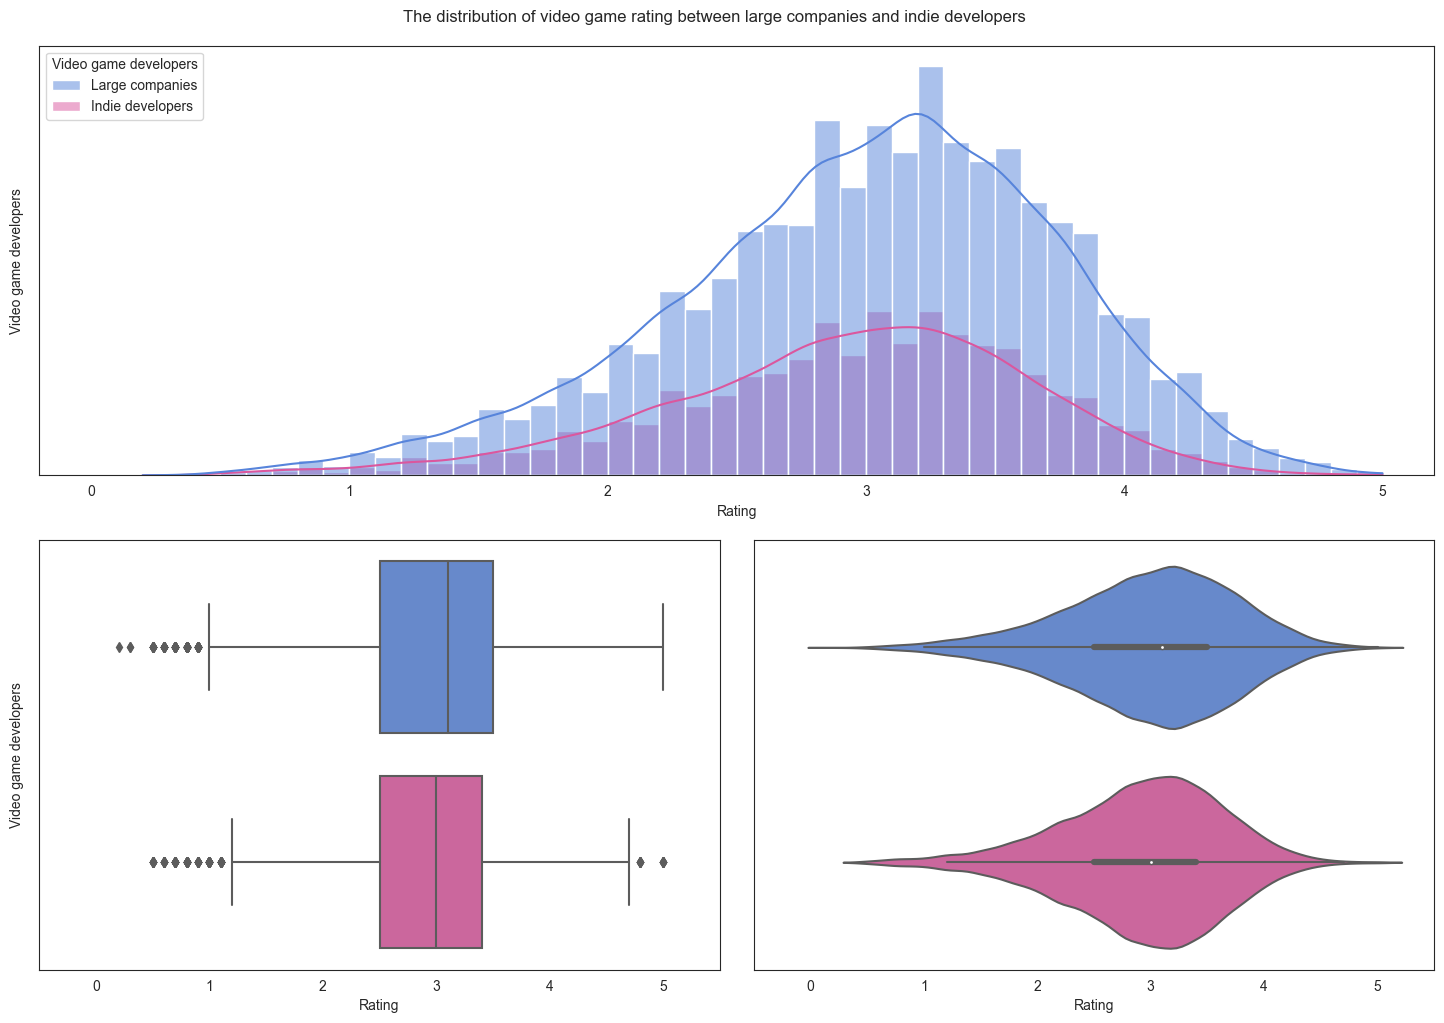

In [61]:
figure = plt.figure(figsize=(18, 12))
grid = GridSpec(2, 2, wspace=0.05, hspace=0.15)
figure.add_subplot(grid[0, :])
figure.add_subplot(grid[1, 0])
figure.add_subplot(grid[1, 1])

plot_data = df.loc[:, ["indie", "rating"]].replace({True: 'Indie developer', False: 'Large company'})

sns.histplot(data=plot_data,
             x="rating",
             hue="indie",
             ax=figure.axes[0],
             bins = 48,
             kde=True,
             palette=sns.color_palette('hls', 10)[6::3]) 
         
sns.boxplot(data=plot_data,
            x="rating",
            y="indie",
            ax=figure.axes[1],
            palette=sns.color_palette('hls', 10)[6::3])

sns.violinplot(data=plot_data,
               x="rating",
               y="indie",
               bw=.15,
               ax=figure.axes[2],
               palette=sns.color_palette("hls", 10)[6::3])

figure.axes[0].legend(figure.axes[0].get_legend().legend_handles, 
                      ['Large companies', 'Indie developers'],
                      title='Video game developers',
                      loc='upper left',
                      alignment='left')

figure.suptitle('The distribution of video game rating between large companies and indie developers', y=0.91)
for i in range(3):
    figure.axes[i].set_xlabel('Rating')
    figure.axes[i].set_ylabel('Video game developers' if i < 2 else "")
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5) if i else (-0.2, 5.2))
    figure.axes[i].set_yticklabels([])

Let's see how the rating is distributed among the top 10 major companies by the number of released video games.

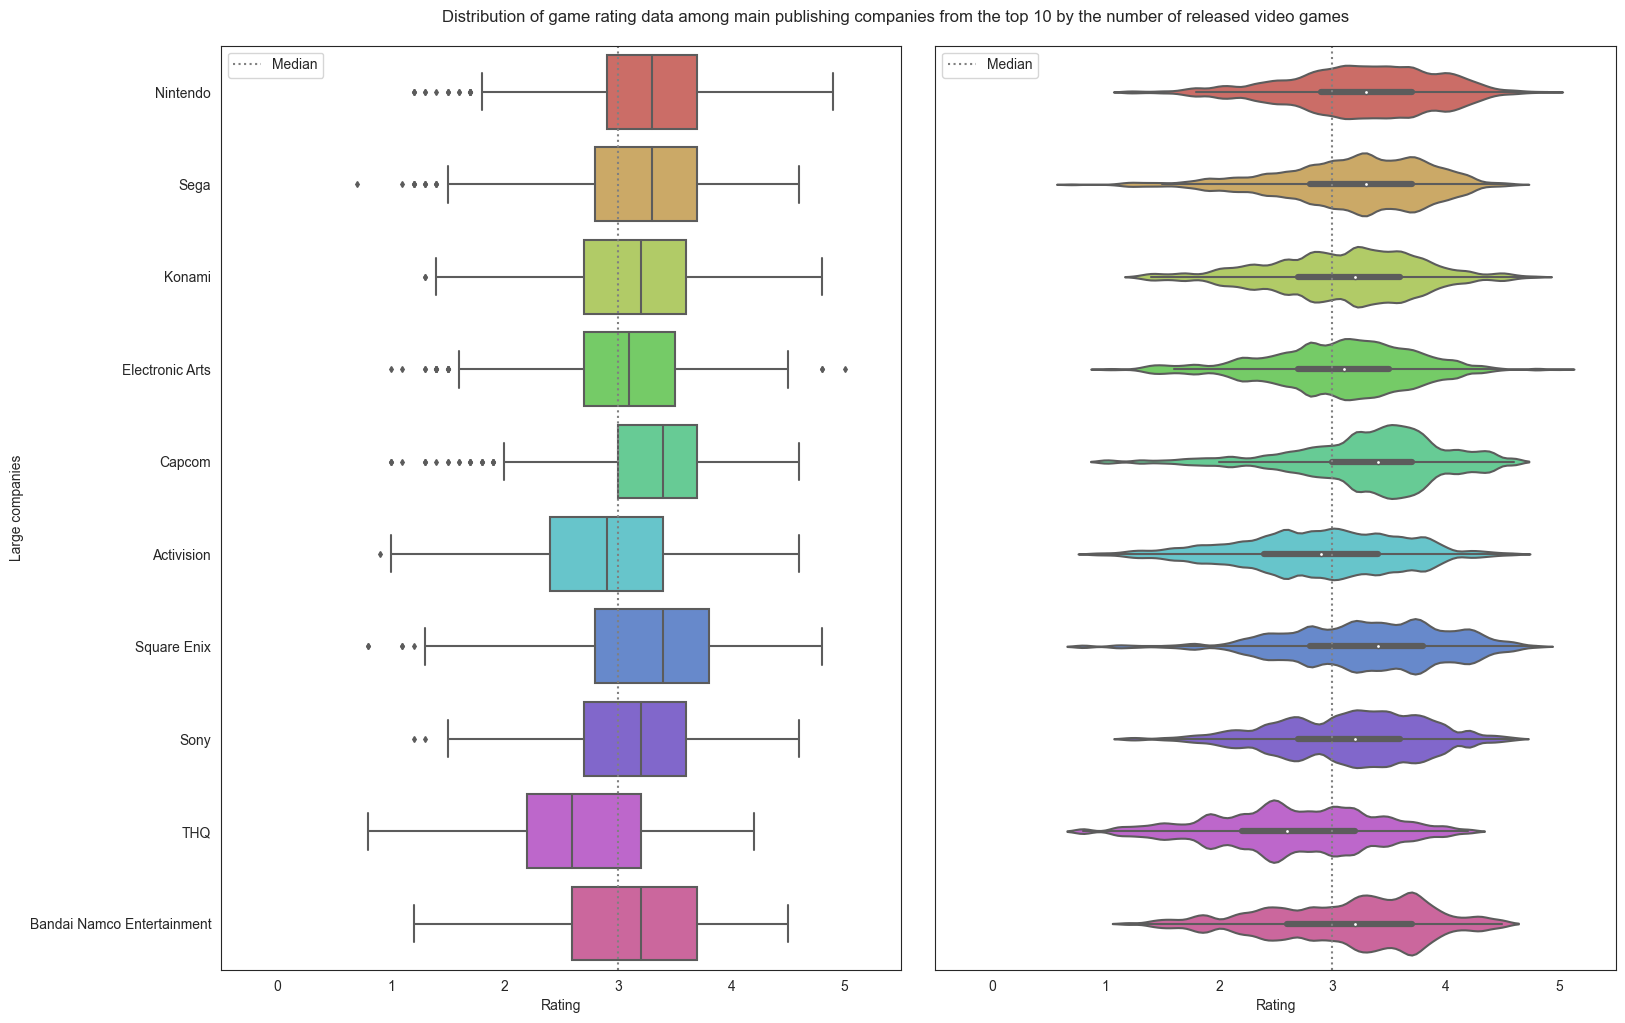

In [62]:
figure = plt.figure(figsize=(18, 12))
grid = GridSpec(1, 2, wspace=0.05)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column="developers")
companies = df.loc[~ df["indie"], "developers"].explode().value_counts()[:10]

plot_data = (data
             .loc[data["developers"].isin(companies.index), ["rating", "developers"]]
             .reset_index(drop=True)
             .sort_values(by="developers", key=lambda x: companies.rank()[x], ascending=False)
             .replace('Sony Computer Entertainment', 'Sony'))

sns.boxplot(data=plot_data,
            x="rating",
            y="developers",
            ax=figure.axes[0],
            palette=sns.color_palette('hls', 10), 
            fliersize=3)

sns.violinplot(data=plot_data,
               x="rating",
               y="developers",
               ax=figure.axes[1],
               bw=.1,
               palette=sns.color_palette('hls', 10))

figure.suptitle('Distribution of game rating data among main publishing companies '
                'from the top 10 by the number of released video games', y=0.91)  
for i in [0, 1]:
    figure.axes[i].axvline(x=3, color='grey', linestyle=':', label='Median')
    figure.axes[i].set_xlabel('Rating')
    figure.axes[i].set_ylabel('Large companies' if not i else "")
    figure.axes[i].legend(loc='upper left')
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5))
    figure.axes[1].set_yticklabels([])
    

It can be seen from the graphs that the rating among the top 10 publishers by the number of released video games is distributed **unequally**, with noticeable deviations from the median. The largest deviation (approximately **0.5**) from the median **to the left** is observed at the publisher **"THQ"**. The largest deviation (approximately **0.5**) from the median **to the right** is observed at the publisher **"Capcom"**. Let's look at the distribution of ratings among **indie developers**.

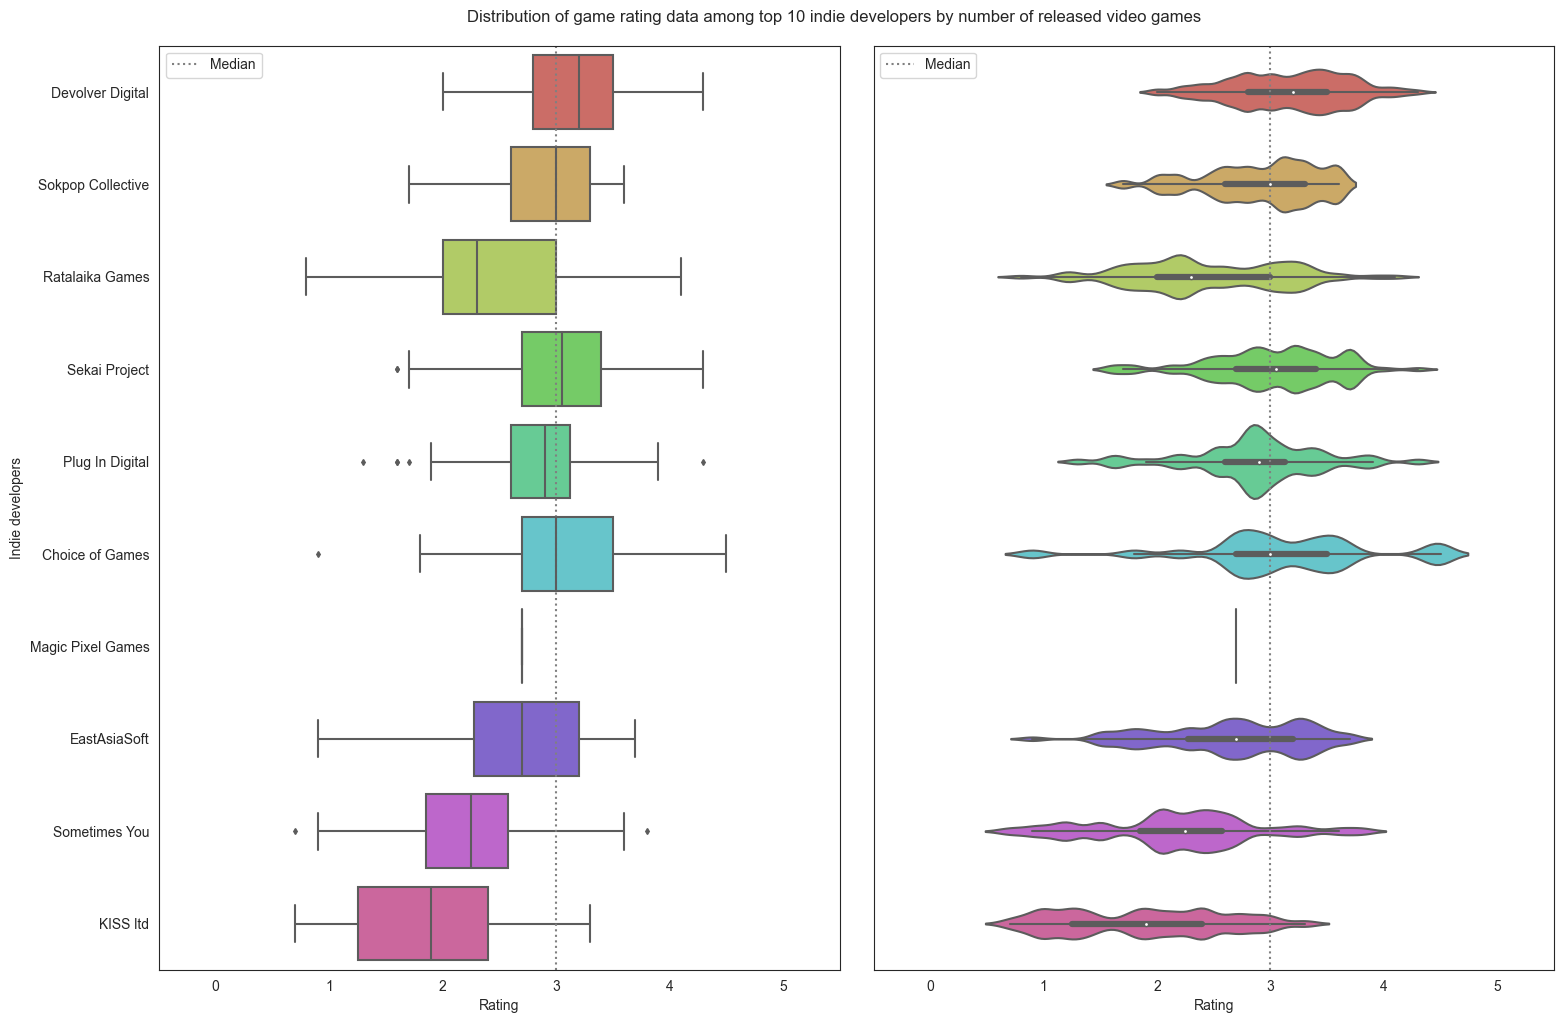

In [63]:
figure = plt.figure(figsize=(18, 12))
grid = GridSpec(1, 2, wspace=0.05)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column="developers")
companies = df.loc[df["indie"], "developers"].explode().value_counts()[:10]

plot_data = (data
             .loc[df["developers"].explode().isin(companies.index), ["rating", "developers"]]
             .reset_index(drop=True)
             .sort_values(by="developers", key=lambda x: companies.rank()[x], ascending=False))

sns.boxplot(data=plot_data,
            x="rating",
            y="developers",
            ax=figure.axes[0],
            palette=sns.color_palette('hls', 10), 
            fliersize=3)

sns.violinplot(data=plot_data,
               x="rating",
               y="developers",
               bw=.15,
               ax=figure.axes[1],
               palette=sns.color_palette('hls', 10))

figure.suptitle("Distribution of game rating data among top 10 indie developers by number of released video games", y=0.91)  
for i in [0, 1]:
    figure.axes[i].axvline(x=3, color='grey', linestyle=':', label='Median')
    figure.axes[i].set_xlabel('Rating')
    figure.axes[i].set_ylabel('Indie developers' if not i else '')
    figure.axes[i].legend(loc='upper left')
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5))
    figure.axes[1].set_yticklabels([])

The rankings among the top 10 indie developers by number of video games released are **more uneven** than the major publishers, with even larger deviations from the median. The largest deviation (approximately **1.1**) from the median **to the left** is observed in indie developer **"KISS Itd"**. The largest deviation (approximately **0.3**) from the median **to the right** is found in indie developers **"Devolver Digital"** and **"PLAYISM"**.

#### <a id=rating_distribution_by_gaming_platforms>By gaming platforms</a>
***

Let's see how the rating is distributed among the top 10 gaming platforms by the number of released video games.

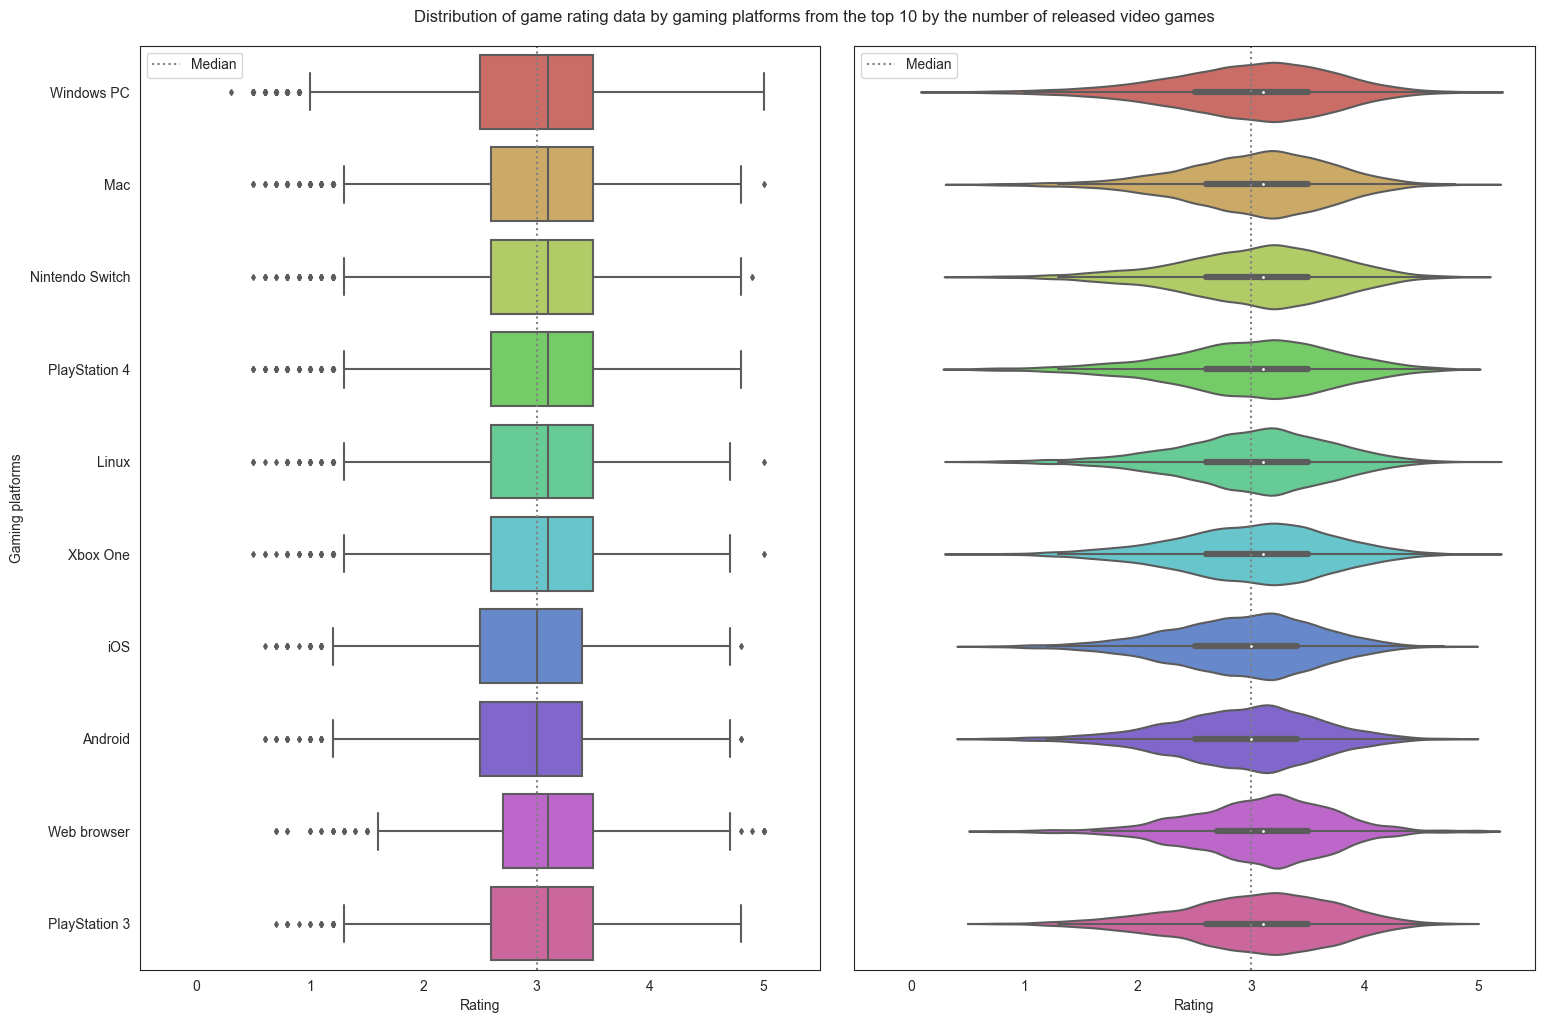

In [64]:
figure = plt.figure(figsize=(18, 12))
grid = GridSpec(1, 2, wspace=0.05)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column="platforms")
platforms = df.loc[:, "platforms"].explode().value_counts().iloc[:10]

plot_data = (data
             .loc[data["platforms"].isin(platforms.index), ["rating", "platforms"]]
             .reset_index(drop=True)
             .sort_values(by="platforms", key=lambda x: platforms.rank()[x], ascending=False))

sns.boxplot(data=plot_data,
             x="rating",
             y="platforms",
             ax=figure.axes[0],
             palette=sns.color_palette('hls', 10), 
             fliersize=3)

sns.violinplot(data=plot_data,
             x="rating",
             y="platforms",
             bw=.15,
             ax=figure.axes[1],
             palette=sns.color_palette('hls', 10))

figure.suptitle('Distribution of game rating data by gaming platforms '
                'from the top 10 by the number of released video games', y=0.91)
for i in [0, 1]:
    figure.axes[i].axvline(x=3, color='grey', linestyle=':', label='Median')
    figure.axes[i].set_xlabel('Rating')
    figure.axes[i].set_ylabel('Gaming platforms' if not i else '')
    figure.axes[i].legend(loc='upper left', alignment='left')
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5))
    figure.axes[1].set_yticklabels([])

It can be seen from the graphs that the rating data between the top 10 gaming platforms by the number of released video games is distributed **evenly**, with small (approximately 0.1) deviations from the median. Let's see how the same data is distributed, but **taking into account the type of developer**.

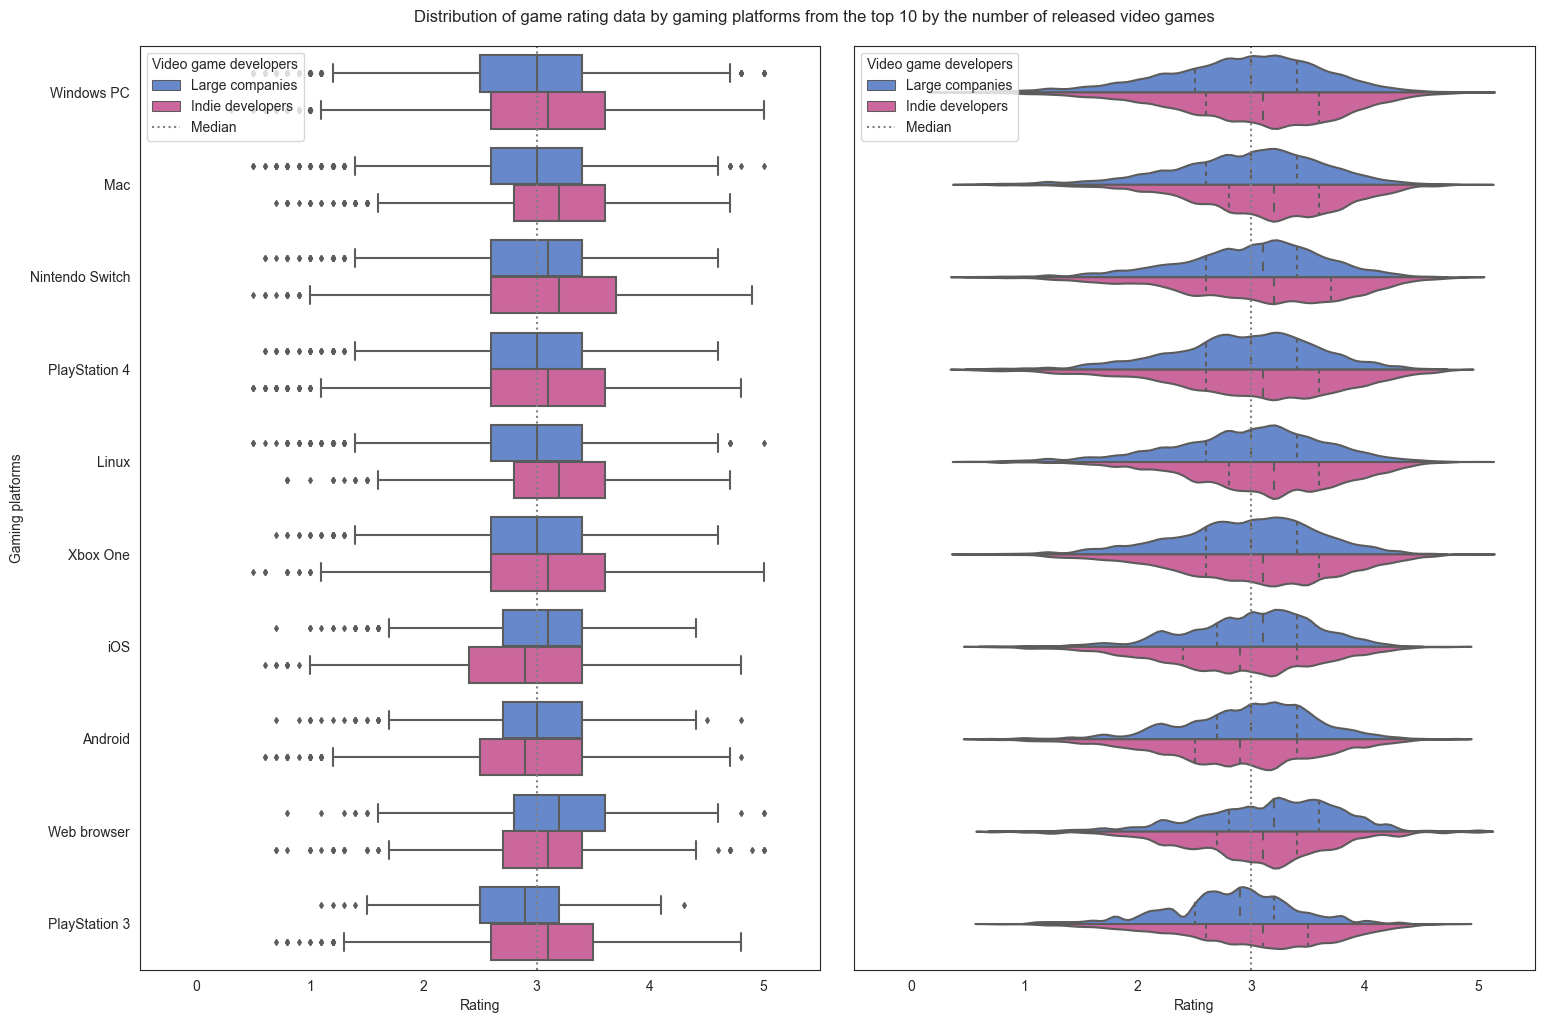

In [65]:
figure = plt.figure(figsize=(18, 12))
grid = GridSpec(1, 2, wspace=0.05)
figure.add_subplot(grid[0, 0])
figure.add_subplot(grid[0, 1])

data = df.explode(column="platforms")
platforms = df.loc[:, "platforms"].explode().value_counts().iloc[:10]

plot_data = (data
             .loc[data["platforms"].isin(platforms.index), ["rating", "platforms", "indie"]]
             .reset_index(drop=True)
             .sort_values(by="platforms", key=lambda x: platforms.rank()[x], ascending=False))

sns.boxplot(data=plot_data,
            x="rating",
            y="platforms",
            hue="indie",
            hue_order=[True, False],
            ax=figure.axes[0],
            palette=sns.color_palette('hls', 10)[6::3], 
            fliersize=3)

sns.violinplot(data=plot_data,
               x="rating",
               y="platforms",
               hue="indie",
               hue_order=[True, False],
               split=True,
               bw=.1,
               inner = 'quartile', 
               ax=figure.axes[1],
               palette=sns.color_palette('hls', 10)[6::3])

figure.suptitle('Distribution of game rating data by gaming platforms '
                'from the top 10 by the number of released video games', y=0.91)
for i in [0, 1]:
    figure.axes[i].axvline(x=3, color='grey', linestyle=':', label='Median')
    figure.axes[i].set_xlabel('Rating')
    figure.axes[i].set_ylabel('Gaming platforms' if not i else '')
    figure.axes[i].legend()
    figure.axes[i].legend(figure.axes[i].get_legend().legend_handles, 
                          ['Large companies', 'Indie developers', 'Median'],
                          title='Video game developers',  
                          loc='upper left', 
                          alignment='left')
    figure.axes[i].set_xlim(0, 5)
    figure.axes[i].set_xbound((-0.5, 5.5))
    figure.axes[1].set_yticklabels([])

Looking at the data by type of developer, you can see that **major publishers** on all game platforms except **"Android"**, **"IOS"** and **"Web browser" "**, the video game ranking median is **to the right** of the **indie developer rankings** median. The biggest difference is seen on the **"PlayStation2"** platform (approximately **0.3**). For this platform, the median rating of video games by large publishing companies is **3.1**, for indie developers - **2.8**, and the rating of indie developers has an **interquartile range** of about **0.5**, for large companies - **1**.

#### <a id=video_game_rating_distribution_conclusions>Intermediate conclusions</a>
***

1. Rating between genres is distributed **evenly**, with slight deviations from the median. The largest and only deviation from the median **to the left** is observed in the **"Sport"** genre. The largest deviation from the median **to the right** is observed in the **"Visual Novel"** genre. Looking at the data by type of developer, you can see that **large publishers** in all genres except **"Shooter"**, **"Platform"** and **"Arcade"**, the video game rating median is **to the right** of the indie developer rating median. The biggest difference is in the **"Visual Novel"** genre (approximately **0.2**).
2. The ranking of video games between major publishers and indie developers is distributed **evenly**. The ranking among the top 10 major companies by number of video games is **unequally distributed**, with noticeable deviations from the median. The largest deviation (approximately **0.5**) from the median **to the left** is observed in the company **"THQ"**. The largest deviation (approximately **0.5**) from the median **to the right** is observed for the publisher **"Capcom"**. The rankings among the top 10 indie developers by number of video games are **more unevenly distributed** than the major publishers, with even larger deviations from the median. The largest deviation (approximately **1.1**) from the median **to the left** is observed in indie developer **"KISS Itd"**. The largest deviation (approximately **0.3**) from the median **to the right** is found in indie developers **"Devolver Digital"** and **"PLAYISM"**.
3. Ratings are distributed **evenly** between gaming platforms, with small (approximately 0.1) deviations from the median to the right. Looking at the data by type of developer, you can see that **major publishers** on all game platforms except **"Android"**, **"IOS"** and **"Web browser" "**, the video game ranking median is **to the right** of the **indie developer rankings** median. The biggest difference is seen on the **"PlayStation2"** platform (approximately **0.3**). For this platform, the median rating of video games of large companies is **3.1**, for indie developers it is **2.8**, and for indie developers the rating has an **interquartile range** of about **0.5**, for large companies - **1**.

## <a id=finding_dependencies>Finding dependencies</a>
***

### <a id=dependence_number_players>Dependence number players</a>
***

#### <a id=dependence_number_player_on_reviews>From the number of reviews left</a>
***

Let's build a dot chart to determine the dependence of the number of **players** of a video game on the number of **reviews** left.

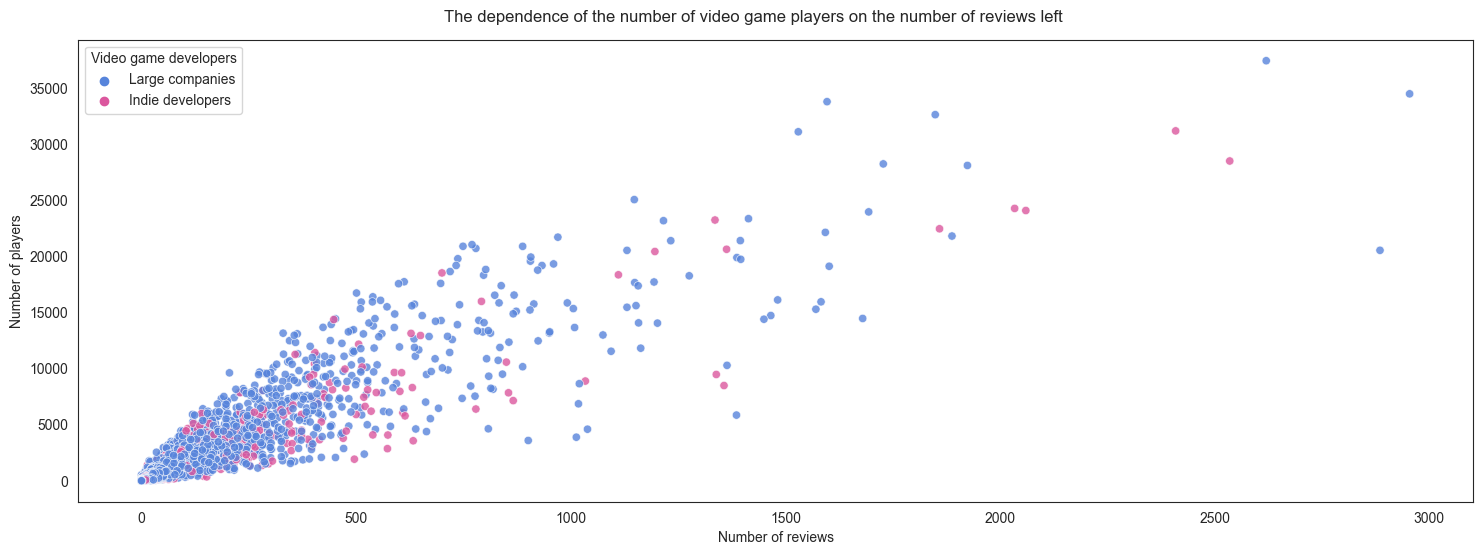

In [66]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

sns.scatterplot(data=df[["plays", "reviews", "indie"]], 
                x="reviews", 
                y="plays",
                hue="indie",
                hue_order=[False, True],
                alpha=0.8, 
                palette=sns.color_palette("hls", 10)[6::3],
                ax=figure.axes[0])

figure.suptitle('The dependence of the number of video game players on the number of reviews left', y=0.93)
figure.axes[0].set_xlabel('Number of reviews')
figure.axes[0].set_ylabel('Number of players')
figure.axes[0].legend(figure.axes[0].get_legend().legend_handles, 
                      ['Large companies', 'Indie developers'],
                      title='Video game developers',
                      loc='upper left',
                      alignment='left');

The graph shows a **linear positive dependence** of the number of video game players on the number of reviews, however, the graph also shows signs of **heteroscedasticity**. This is probably due to the fact that for video games with a small number of players, almost every player does not leave a review. With an increase in the number of players, all players are unevenly divided into those who leave feedback and those who do not. But in most cases, those who have already played this game leave a review. Let us determine the Pearson correlation coefficient.

In [67]:
print(f'Pearson correlation coefficient: {df["plays"].corr(df["reviews"]):.2f}')

Pearson correlation coefficient: 0.92


#### <a id=dependence_number_players_on_players_currently>From the number of people currently playing</a>
***

Let's build a dot chart to determine the dependence of the number of **players** of a video game on the number of **playing people** at the moment.

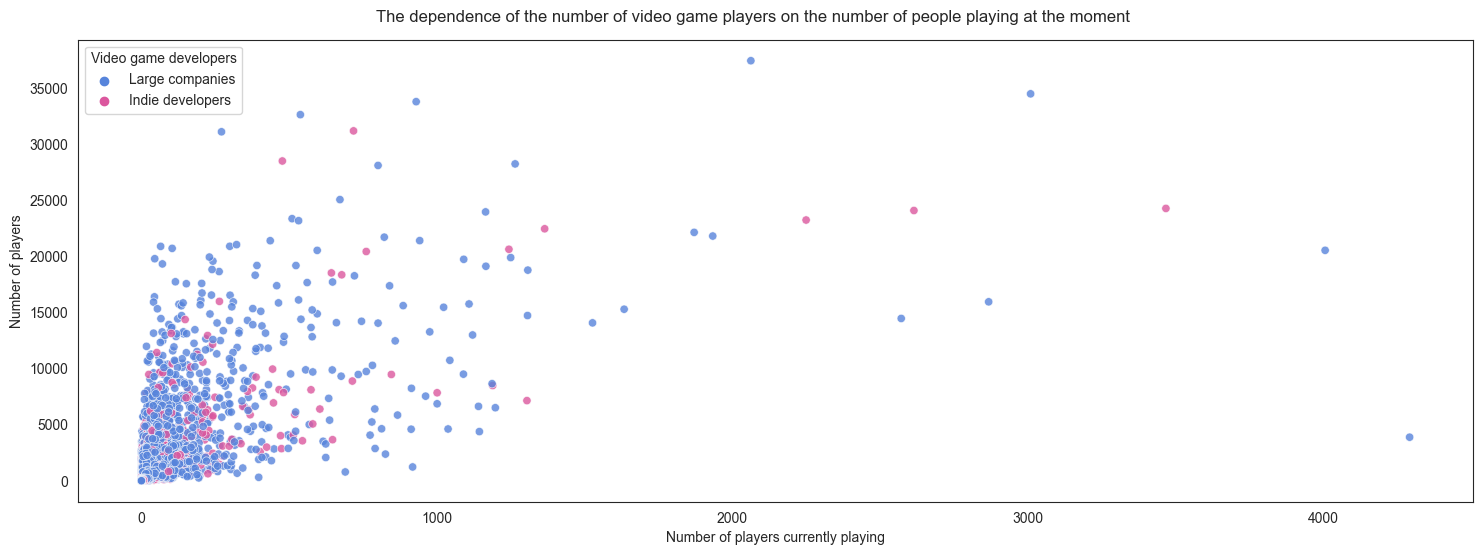

In [68]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

sns.scatterplot(data=df[["plays", "playing", "indie"]], 
                x="playing", 
                y="plays", 
                hue="indie",
                hue_order=[False, True],
                alpha=0.8, 
                palette=sns.color_palette("hls", 10)[6::3],
                ax=figure.axes[0])

figure.suptitle('The dependence of the number of video game players on the number of people playing at the moment', y=0.93)
figure.axes[0].set_xlabel('Number of players currently playing')
figure.axes[0].set_ylabel('Number of players')
figure.axes[0].legend(figure.axes[0].get_legend().legend_handles, 
                      ['Large companies', 'Indie developers'],
                      title='Video game developers',
                      loc='upper left',
                      alignment='left');

The graph shows a **linear positive dependence** of the number of video game players on the number of people playing at the moment, however, the graph also shows signs of **heteroskedasticity**, even stronger than the dependence of the number of video game players on the number of reviews left. This is probably due to the fact that most of the games that are not played at the moment, in general, had a small number of players, or not at all. When the total number of players increases, the range of the number of players currently playing expands to a certain number, depending on the release date of the game. That is, there are games with a small number of players playing at the moment, but a large total number of players if the game was released a long time ago. Conversely, if the game is recently released, it may have a large number of players at the moment, but a relatively small total number of players. Let us determine the Pearson correlation coefficient.

In [69]:
print(f'Pearson correlation coefficient: {df["plays"].corr(df["playing"]):.2f}')

Pearson correlation coefficient: 0.65


#### <a id=dependence_number_players_on_additions_wishlist>From the number of additions to the wishlist</a>
***

Let's build a scatter chart to determine the dependence of the number of **players** of a video game on the number of additions to **wishlist**.

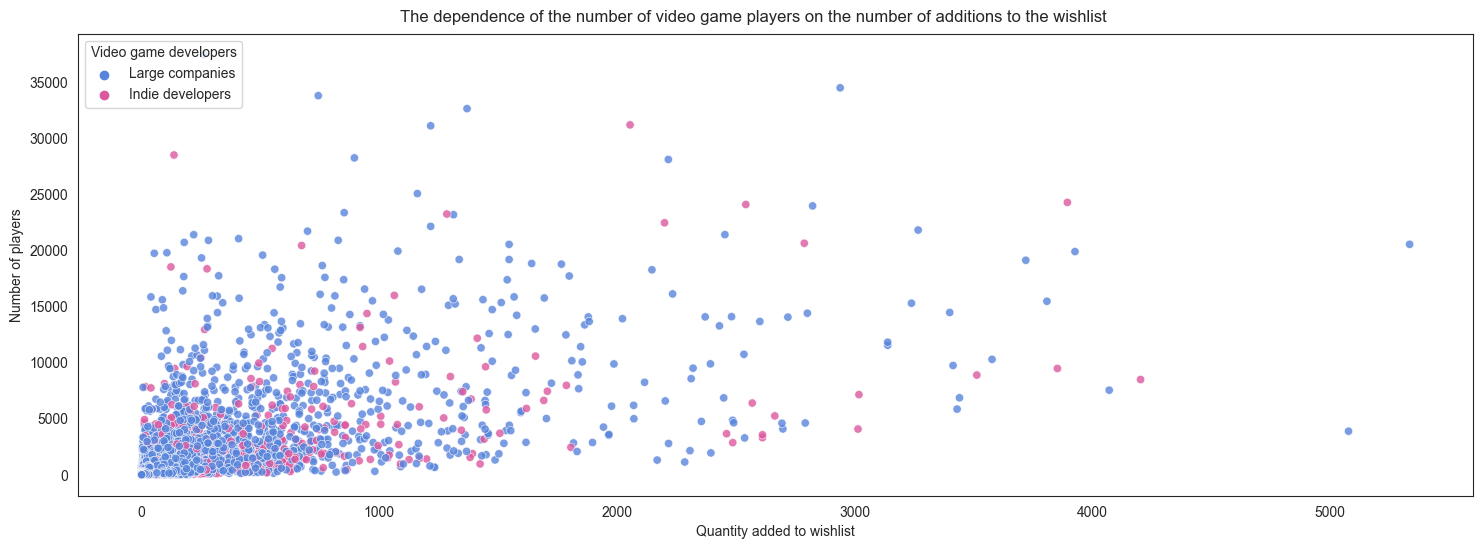

In [70]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

sns.scatterplot(data=df[["plays", "wishlists", "indie"]], 
                x="wishlists", 
                y="plays", 
                hue="indie",
                hue_order=[False, True],
                alpha=0.8, 
                palette=sns.color_palette("hls", 10)[6::3],
                ax=figure.axes[0])

figure.suptitle('The dependence of the number of video game players on the number of additions to the wishlist', y=0.92)
figure.axes[0].set_xlabel('Quantity added to wishlist')
figure.axes[0].set_ylabel('Number of players')
figure.axes[0].legend(figure.axes[0].get_legend().legend_handles, 
                      ['Large companies', 'Indie developers'],
                      title='Video game developers',
                      loc='upper left',
                      alignment='left');

The graph shows a **linear positive dependence** of the number of video game players on the number of additions to the wishlist, however, the graph also shows signs of **heteroscedasticity**, similar to the dependence of the number of video game players on the number of people playing at the moment. This is probably due to the fact that most of the games that were not wishlisted generally had few or no players at all. With an increase in the total number of players, the range of the number of additions to the wishlist expands to a certain number. That is, there are games with a small number of additions to the wishlist, but a large total number of players. A game may have a large number of wishlist additions, but a small total number of players. Let us determine the Pearson correlation coefficient.

In [71]:
print(f'Pearson correlation coefficient: {df["plays"].corr(df["wishlists"]):.2f}')

Pearson correlation coefficient: 0.67


#### <a id=dependence_number_players_on_additions_backlog>From the number of additions to the backlog</a>
***

Let's build a scatter chart to determine the dependence of the number of **players** of a video game on the number of additions to **backlog**.

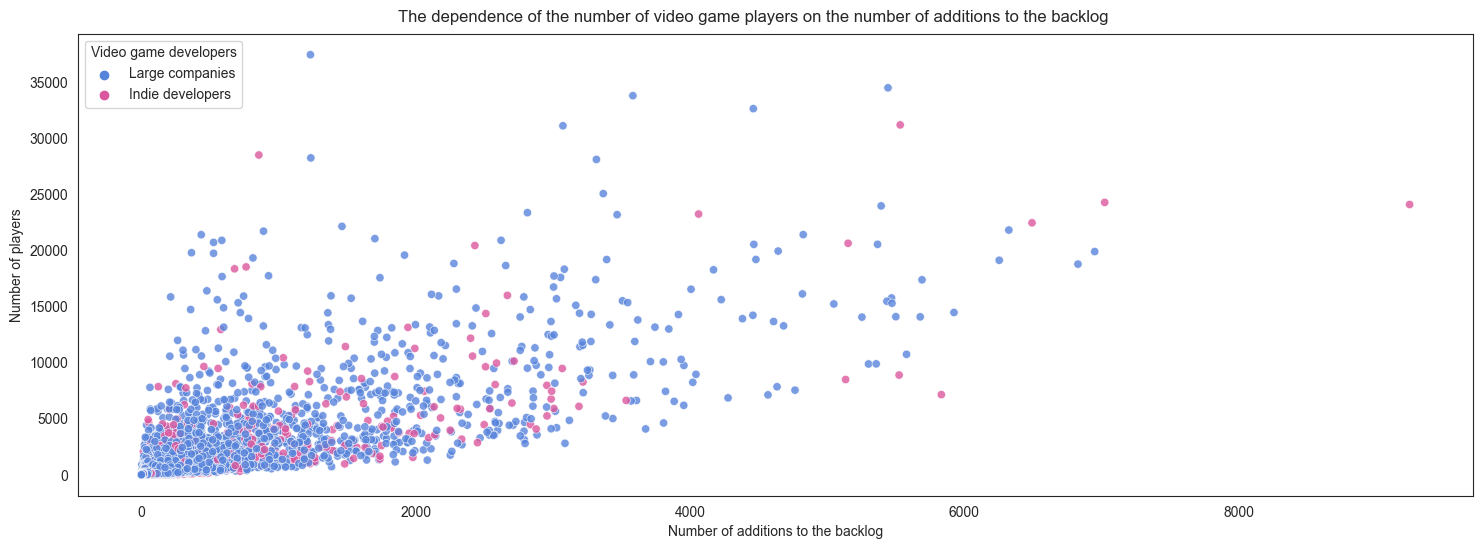

In [72]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

sns.scatterplot(data=df[["plays", "backlogs", "indie"]], 
                x="backlogs", 
                y="plays", 
                hue="indie",
                hue_order=[False, True],
                alpha=0.8, 
                palette=sns.color_palette("hls", 10)[6::3],
                ax=figure.axes[0])

figure.suptitle('The dependence of the number of video game players on the number of additions to the backlog', y=0.92)
figure.axes[0].set_xlabel('Number of additions to the backlog')
figure.axes[0].set_ylabel('Number of players')
figure.axes[0].legend(figure.axes[0].get_legend().legend_handles, 
                      ['Large companies', 'Indie developers'],
                      title='Video game developers',
                      loc='upper left',
                      alignment='left');

The graph shows a **linear positive dependence** of the number of video game players on the number of additions to the backlog, however, the graph also shows signs of **heteroscedasticity**, This is probably due to the fact that most of the games that were not added to the backlog, in general there were few players, or none at all. With an increase in the total number of players, the range of the number of additions to the backlog expands to a certain number. That is, there are games with a small number of additions to the backlog, but a large total number of players. A game may have a large number of backlog additions, but a small total number of players (players who purchased the game but never played it). Let us determine the Pearson correlation coefficient.

In [73]:
print(f'Pearson correlation coefficient: {df["plays"].corr(df["backlogs"]):.2f}')

Pearson correlation coefficient: 0.79


#### <a id=multicollinearity_estimation>Multicollinearity estimation</a>
***

Let's display the correlation matrix on a heat map for the "reviews", "plays", "playing", "backlogs" and "wishlists" fields.

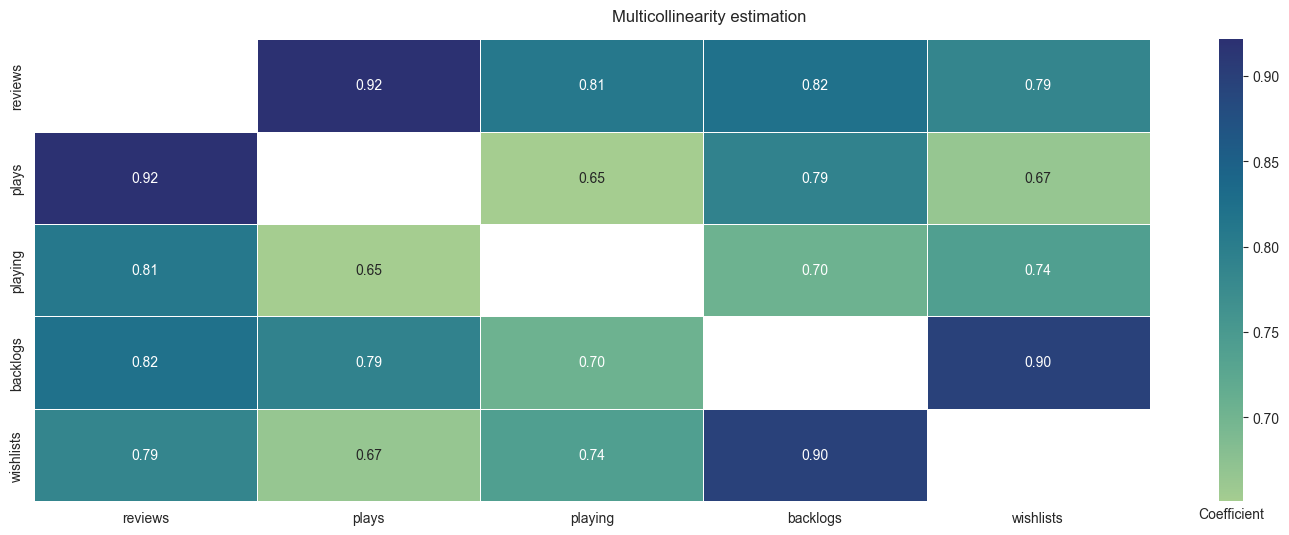

In [74]:
figure = plt.figure(figsize=(18, 6))
figure.add_subplot()

plot_data = df[["reviews", "plays", "playing", "backlogs", "wishlists"]].corr()

sns.heatmap(data=plot_data,
            ax=figure.axes[0],
            annot=True,
            linewidths=.5,
            fmt=".2f",
            mask = plot_data == 1, 
            cmap="crest")

figure.suptitle('Multicollinearity estimation', y=0.93)
figure.axes[1].set_xlabel('Coefficient');

**Each pair** of variables ("reviews", "plays", "playing", "backlogs", "wishlists") has a **strong positive dependence** (Pearson's correlation coefficient for each of the pairs is not less than **0.65 **)

#### <a id=dependence_number_players_conclusions>Intermediate conclusions</a>
***

1. There is a **linear relationship** between the number of video game players and the number of reviews left (Pearson's correlation coefficient is **0.92**). The linear dependence has signs of **heteroscedasticity**. This is probably due to the fact that for video games with a small number of players, almost every player does not leave a review. With an increase in the number of players, all players are unevenly divided into those who leave feedback and those who do not. But in most cases, those who have already played this game leave a review.
2. There is a **linear relationship** between the number of video game players and the number of people currently playing (Pearson's correlation coefficient is **0.65**). The linear relationship has signs of **heteroskedasticity**, even stronger than the dependence of the number of video game players on the number of reviews left. This is probably due to the fact that most of the games that are not played at the moment, in general, had a small number of players, or not at all. When the total number of players increases, the range of the number of players currently playing expands to a certain number, depending on the release date of the game. That is, there are games with a small number of players playing at the moment, but a large total number of players if the game was released a long time ago. Conversely, if the game is recently released, it may have a large number of players at the moment, but a relatively small total number of players.
3. There is a **linear relationship** between the number of video game players and the number of wishlist additions (Pearson's correlation coefficient is **0.65**). The linear relationship has signs of **heteroscedasticity**, similar to the dependence of the number of video game players on the number of people playing at the moment. This is probably due to the fact that most of the games that were not wishlisted generally had few or no players at all. With an increase in the total number of players, the range of the number of additions to the wishlist expands to a certain number. That is, there are games with a small number of additions to the wishlist, but a large total number of players. A game may have a large number of wishlist additions, but a small total number of players;
4. There is a **linear relationship** between the number of video game players and the number of wishlist additions (Pearson's correlation coefficient is **0.79**). The linear dependence has signs of **heteroscedasticity**. This is probably due to the fact that most of the games that were not added to the backlog generally had a small number of players, or not at all. With an increase in the total number of players, the range of the number of additions to the backlog expands to a certain number. That is, there are games with a small number of additions to the backlog, but a large total number of players. A game may have a large number of backlog additions, but a small total number of players (players who purchased the game but never played it).
5. **Each pair** of variables ("reviews", "plays", "playing", "backlogs", "wishlists") has a **strong positive dependence** (Pearson's correlation coefficient for each of the pairs is not lower than **0.65**).

## <a id=conclusions>Conclusions</a>
***

1. **Data distribution analysis**.
    1. **General distribution of variables**:
        - the top 10 genres by number of video games are: **Adventure**, **Simulator**, **Strategy**, **RPG**, **Puzzle**, **Shooter**, **Arcade**, **Platform** and **Sport**. Approximately **1 in 3 games** are in the **Adventure** genre, which accounts for **33.93%** of video games. Video game genres were split approximately **2 to 3** between large companies and indie developers (60% - large companies, 40% - indie developers), except for the **Adventure** and **Sport** genres. For the **Adventure** genre, the distribution is approximately **1 to 1** (50.87% - large companies, 49.13% - indie developers), for the **Sport** genre - **1 to 4** (82.79% - large companies, 17.21% - indie developers).
        - approximately **2/3** of the market (**65.18%**) is occupied by **large publishers**, the rest (**34.82%**) is occupied by **indie developers**. The top 10 major publishers by number of video games released are: **Nintendo**, **Konami**, **Sega**, **Electronic Arts**, **Capcom**, **Activision** , **Sony Computer Entertainment**, **Square Enix**, **Bandai** and **THQ**. Approximately **1 in 100 games** released by **Nintendo**, **Konami** and **Sega**, these publishers account for **1.5%**, **1.2%** and **1.2%** of released video games respectively. The top 10 indie developers by number of released video games are: **Sokpop Collective**, **Devolver Digital**, **Plug In Digital**, **Ratalaika Games**, **Sekai Project**, **Choice of Games**, **Sometimes You**, **KISS ltd**, **EastAsiaSoft** and **PLAYISM**. For each indie developer, the **share of released games** is **no more than 0.15%**.
        - top 10 by number of released video games are the following platforms: **Windows PC**, **Mac**, **Nintendo Switch**, **Linux**, **iOS**, **PlayStation 4 **, **Android**, **Xbox One**, **Web browser** and **PlayStation 3**. Approximately **1 in 2 games** are released for the **Windows PC** platform, accounting for **57.4%** of released video games respectively. Game platforms are unevenly distributed between large companies and indie developers, on **iOS**, **Android**, **Web browser** and **PlayStation 3** platforms, the largest number of video games belongs to **large companies**, on **Windows PC**, **Mac**, **Nintendo Switch** and **Linux** platforms - **indie developers**. The **PlayStation 4** and **Xbox One** platforms have approximately the same number of large companies and indie developers.
        - most video games - **86.00%**, is a **major release**.
        - most **often** games were released in **December** (15.5%), on the **first** (9.2%) or **last** (8.2%) days of the month. Approximately **1 in 6** games were released in December, **1 in 10** on the 1st or 31st. If we separately consider large-companies and indie-developers, then for **large companies** the above distribution of video game releases **is preserved**. For **Indie Developers**, distribution of video game releases is **even** except for days of the week.
    2. **Video game rating distribution analysis**:
        - rating between genres is distributed **evenly**, with slight deviations from the median. The largest and only deviation from the median **to the left** is observed in the **"Sport"** genre. The largest deviation from the median **to the right** is observed in the **"Visual Novel"** genre. Looking at the data by type of developer, you can see that **large publishers** in all genres except **"Shooter"**, **"Platform"** and **"Arcade"**, the video game rating median is **to the right** of the indie developer rating median. The biggest difference is in the **"Visual Novel"** genre (approximately **0.2**).
        - the ranking of video games between major publishers and indie developers is distributed **evenly**. The ranking among the top 10 major companies by number of video games is **unequally distributed**, with noticeable deviations from the median. The largest deviation (approximately **0.5**) from the median **to the left** is observed in the company **"THQ"**. The largest deviation (approximately **0.5**) from the median **to the right** is observed for the publisher **"Capcom"**. The rankings among the top 10 indie developers by number of video games are **more unevenly distributed** than the major publishers, with even larger deviations from the median. The largest deviation (approximately **1.1**) from the median **to the left** is observed in indie developer **"KISS Itd"**. The largest deviation (approximately **0.3**) from the median **to the right** is found in indie developers **"Devolver Digital"** and **"PLAYISM"**.
        - ratings are distributed **evenly** between gaming platforms, with small (approximately 0.1) deviations from the median to the right. Looking at the data by type of developer, you can see that **major publishers** on all game platforms except **"Android"**, **"IOS"** and **"Web browser" "**, the video game ranking median is **to the right** of the **indie developer rankings** median. The biggest difference is seen on the **"PlayStation2"** platform (approximately **0.3**). For this platform, the median rating of video games of large companies is **3.1**, for indie developers it is **2.8**, and for indie developers the rating has an **interquartile range** of about **0.5**, for large companies - **1**.
2. **Search for dependencies**.
    1. **Dependence of the number of players**:
        - there is a **linear relationship** between the number of video game players and the number of reviews left (Pearson's correlation coefficient is **0.92**). The linear dependence has signs of **heteroscedasticity**. This is probably due to the fact that for video games with a small number of players, almost every player does not leave a review. With an increase in the number of players, all players are unevenly divided into those who leave feedback and those who do not. But in most cases, those who have already played this game leave a review.
        - there is a **linear relationship** between the number of video game players and the number of people currently playing (Pearson's correlation coefficient is **0.65**). The linear relationship has signs of **heteroskedasticity**, even stronger than the dependence of the number of video game players on the number of reviews left. This is probably due to the fact that most of the games that are not played at the moment, in general, had a small number of players, or not at all. When the total number of players increases, the range of the number of players currently playing expands to a certain number, depending on the release date of the game. That is, there are games with a small number of players playing at the moment, but a large total number of players if the game was released a long time ago. Conversely, if the game is recently released, it may have a large number of players at the moment, but a relatively small total number of players.
        - there is a **linear relationship** between the number of video game players and the number of wishlist additions (Pearson's correlation coefficient is **0.65**). The linear relationship has signs of **heteroscedasticity**, similar to the dependence of the number of video game players on the number of people playing at the moment. This is probably due to the fact that most of the games that were not wishlisted generally had few or no players at all. With an increase in the total number of players, the range of the number of additions to the wishlist expands to a certain number. That is, there are games with a small number of additions to the wishlist, but a large total number of players. A game may have a large number of wishlist additions, but a small total number of players;
        - there is a **linear relationship** between the number of video game players and the number of wishlist additions (Pearson's correlation coefficient is **0.79**). The linear dependence has signs of **heteroscedasticity**. This is probably due to the fact that most of the games that were not added to the backlog generally had a small number of players, or not at all. With an increase in the total number of players, the range of the number of additions to the backlog expands to a certain number. That is, there are games with a small number of additions to the backlog, but a large total number of players. A game may have a large number of backlog additions, but a small total number of players (players who purchased the game but never played it).
        - **each pair** of variables ("reviews", "plays", "playing", "backlogs", "wishlists") has a **strong positive dependence** (Pearson's correlation coefficient for each of the pairs is not lower than **0.65**).
***